In [2]:
import pandas as pd
import numpy as np
import re
import whois

In [2]:
base_df = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/dataset.csv')
print(base_df)

                                                     URL  URLType
0      http://mylust.com/videos/215137/my-raunchy-loo...        0
1      http://mic.com/articles/101766/one-perfect-twe...        0
2      http://stackexchange.com/newsletters/newslette...        0
3      http://bisaneema.org/%e0%a4%ad%e0%a4%be%e0%a4%...        1
4      http://skyrock.com/videos/eDJwODRhNzoxMw==-bug...        0
...                                                  ...      ...
46939  http://themeforest.net/item/artistas-modern-po...        0
46940  http://torcache.net/torrent/2EE5318B3923B273EF...        0
46941  http://grasslandhotel.com.vn/index.php/compone...        1
46942  http://conservativetribune.com/barack-obama-ju...        0
46943  http://sberbank.ru/moscow/ru/person/investment...        0

[46944 rows x 2 columns]


In [84]:
import datetime
from socket import *

def host_ft_extract(url):
    if not url:
        return
    
    feature_list = []
    url_dt = {}
    url_regex = '(?:http.*://)?(?P<host>[^:/ ]+).*'
    url_search = re.search(url_regex, url)
    hostname = url_search.group('host')

    try:
        domain = whois.whois(hostname)
    except whois.parser.PywhoisError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        return df
    except timeout:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except gaierror:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except ConnectionResetError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except ConnectionRefusedError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
        
        
    reg_date = domain.creation_date
    if isinstance(reg_date, list):
        url_dt.update({"RegistryDate": reg_date[0]})
    elif (reg_date is None) or (reg_date == ""):
        url_dt.update({"RegistryDate": pd.NaT})
    else:
        try:
            url_dt.update({"RegistryDate": pd.to_datetime(reg_date)})
        except ValueError:
            url_dt.update({"RegistryDate": pd.NaT})

    exp_date = domain.expiration_date
    if isinstance(exp_date, list):
        url_dt.update({"ExpirationDate": exp_date[0]})
    elif (exp_date is None) or (exp_date == ""):
        url_dt.update({"ExpirationDate": pd.NaT})
    else:
        try:
            url_dt.update({"ExpirationDate": pd.to_datetime(exp_date)})
        except ValueError:
            url_dt.update({"ExpirationDate": pd.NaT})

    country = domain.country
    url_dt.update({"HostCountry": country})

    if pd.isnull(url_dt["RegistryDate"]):
        domain_age = 0
        url_dt.update({"DomainAge": domain_age})
    else:
        domain_age = datetime.datetime.now() - url_dt["RegistryDate"]
        age_in_days = domain_age.days
        url_dt.update({"DomainAge": age_in_days})

    feature_list.append(url_dt)
    df = pd.DataFrame(feature_list)
    if pd.isnull(df["ExpirationDate"].any):
        df["ExpYear"] = float("NaN")
        df["ExpMonth"] = float("NaN")
        df["ExpDay"] = float("NaN")
    else:
        df["ExpYear"] = df["ExpirationDate"].dt.year
        df["ExpMonth"] = df["ExpirationDate"].dt.month
        df["ExpDay"] = df["ExpirationDate"].dt.day
    
    return df

In [49]:
dataframe_list = []
for idx, row in base_df.iterrows():
    print(row['URL'])
    feature_df = host_ft_extract(row['URL'])
    feature_df['URLType'] = row["URLType"]
    dataframe_list.append(feature_df)
    print(feature_df)
    
extracted_df = pd.DataFrame.concat(dataframe_list)
print(extracted_df)

http://mylust.com/videos/215137/my-raunchy-looking-wife-definitely-loves-missionary-position/
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-11-19 05:50:20 2021-11-19 05:50:20          PA       5594     2021   

   ExpMonth  ExpDay  URLType  
0        11      19        0  
http://mic.com/articles/101766/one-perfect-tweet-calls-out-the-hypocrisy-of-how-the-media-talks-about-black-violence
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://stackexchange.com/newsletters/newsletter?site=productivity.stackexchange.com
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://bisaneema.org/%e0%a4%ad%e0%a4%be%e0%a4%

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://icicibank.com/Personal-Banking/onlineservice/online-services/online-tax-payment/manage-tax.page
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          IN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://kienthuc.net.vn/hoi-dap-ve-tuyen-sinh/phuong-an-thi-moi-co-lam-giam-ty-le-do-tot-nghiep-thpt-463742.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://www.xj9599.com/app/member/indexx.php?path=pages&pages=yh&uid=f554ab9b50d41d8cd98fra3
IS LIST
         RegistryDate      ExpirationDate HostCountry  Dom

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://nypost.com/2015/05/13/rangers-strategy-for-dealing-with-trash-talking-alex-ovechkin/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://9779.info/%E5%B0%91%E5%84%BF%E7%A7%8D%E5%AD%90%E7%B2%98%E8%B4%B4%E7%94%BB/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://3cf.ru/2015/07/20/stoimost-nefti-wti-vpervye-s-aprelia-ypala-nije-50-za-barrel/
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          Na

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://hollywoodlife.com/2015/04/01/iggy-azalea-boob-job-10-year-old-boy-interview/
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1999-09-29 06:03:23 2020-09-29 06:03:14          US       7472     2020   

   ExpMonth  ExpDay  URLType  
0         9      29        0  
http://atwiki.jp/wiki/%E3%83%B4%E3%82%A1%E3%83%B3%E3%82%AC%E3%83%BC%E3%83%89%E3%81%AE%E3%83%87%E3%83%83%E3%82%AD%E3%81%AE%E4%BD%9C%E3%82%8A%E6%96%B9
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
https://dribbble.com/shots/1952800-ViRail-Website-Redesign-with-Google-Material-Design
IS LIST
         Regi

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://sourceforge.net/directory/communications/add_facet_filter?facet=license&constraint=OSI-Approved+Open+Source+%3A%3A+GNU+Library+or+Lesser+General+Public+License+version+2.0+%28LGPLv2%29
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://schertzauto.com/wp-content/plugins/revslider/rs-plugin/css/settings.css?rev=4.6.0&ver=4.2.2
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-10-12 22:23:19 2021-10-12 22:23:19          US       5997     2021   

   ExpMonth  ExpDay  URLType  
0        10      12        1  
http://9779.info/%E4%BA%BA%E7%89%A9%E6%8A%BD%E8%B1

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
https://myspace.com/article/2015/5/4/watch-blur-perform-tender-backstage-with-jimmy-fallon
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://9779.info/%E7%AB%8B%E4%BD%93%E5%B8%83%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://tunein.com/radio/Tampa-Yankees-at-St-Lucie-Mets-May-13-2015-p729092/15480783/ca-pub-1542925551861702/Program
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCo

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://katproxy.com/secret-wars-prelude-2015-digital-zone-empire-cbr-nem-t10610172.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://thenextweb.com/in/2014/11/13/uber-introduces-paytm-digital-wallet-payments-india-response-new-e-commerce-ruling/gtm.js
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://www.js182.com/app/member/SportOption.php?uid=guest&langx=gb
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT   

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://tobogo.net/cdsb/board.php?board=knowhow&bm=view&no=978&category=&auth=&page=1&search=&keyword=&recom=
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://depositphotos.com/login.html?url=%2F33474795%2Fstock-illustration-vector-abstract-3d-paper-infographics.html
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate           HostCountry  DomainAge  ExpYear  \
0          NaT            NaT  REDACTED FOR PRIVACY          0      NaN   

   ExpMonth  ExpDay  URLType  
0       NaN     NaN        0  
http://mp3-pesnja.com/song/%D0%BC%D0%B0%D1%88%D0%B0+%D0%B8+%D0%BC%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D1%8C+%2

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          BS          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://fanpage.gr/wp-content/plugins/contact-form-7/includes/js/jquery.form.min.js?ver=3.51.0-2014.06.20
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://9779.info/%E7%A2%8E%E5%B8%83%E5%A4%B4%E5%88%B6%E4%BD%9C%E8%B4%B4%E7%94%BB%E5%9B%BE%E8%A7%A3/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://twitter.com/home?status=%E3%83%8C%E3%81%91%E3%82%8B%EF%BC%81%E3%80%90%E4%BA%BA%E5%A6%BB%E3%83%BB%E7%86%9F%E5%A5%B3%E3%80%91+http%3A%2F%2F

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://censor.net.ua/photo_news/294927/chasy_ukrasheniya_i_izdeliya_iz_dragotsennyh_metallov_napravlyayutsya_v_fond_oborony_dnr_terrorist_strelkov
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://torcache.net/torrent/51E482B4A1C3BADF8706C2D0697FC7D73708B8C4.torrent?title=[kickass.to]arrow.s03e18.hdtv.x264.lol.ettv
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3242     2020   

   ExpMonth  ExpDay  URLType  
0         4      29        0  
http://udn.com/news/story/6811/901303-%E8%8B%B1%E5%A4%AE%E8%A1%8C-%

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://9779.info/%E5%BA%9F%E6%97%A7%E6%9D%90%E6%96%99%E5%89%AA%E8%B4%B4%E7%94%BB/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://9779.info/%E5%89%AA%E8%B4%B4%E7%94%BB%E7%BA%BF%E6%8F%8F%E4%BD%9C%E5%93%81%E6%AC%A3%E8%B5%8F/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://pikabu.ru/tag/%D0%BF%D1%81%D0%B8%D1%85%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F/hot
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  Exp

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          EG          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://abcnews.go.com/US/wireStory/woman-accused-killing-fiance-kayak-trip-seeks-bail-31013838
ISNT LIST
         RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-01-09 05:00:00            NaT          US       8100      NaN   

   ExpMonth  ExpDay  URLType  
0       NaN     NaN        0  
http://tobogo.net/cdsb/board.php?board=storytv&bm=view&no=556&category=&auth=&page=1&search=&keyword=&recom=
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://stackoverflow.com/questions/30062864/where-do-the-bullets-come-from-on-li-elements
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate H

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://clien.net/cs2/bbs/register.php?url=%2Fcs2%2Fbbs%2Fboard.php%3Fbo_table%3Dhongbo
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2001-10-26 06:29:51 2020-10-26 06:29:51          KR       6714     2020   

   ExpMonth  ExpDay  URLType  
0        10      26        0  
http://askubuntu.com/questions/590630/write-tags-from-collection-to-files-in-amarok
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://bdnews24.com/world/2015/05/13/north-korea-to-launch-live-fire-drills-near-disputed-sea-border-with-south
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate Host

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://kenh14.vn/sport/cong-vinh-lap-cu-dup-giup-dtvn-thang-3-0-lua-u23-20150510095338363.chn
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://olx.ua/uk/list/q-%D0%B4%D0%B8%D0%B2%D0%B0%D0%BD/?search%5Bprivate_business%5D=business
ISNT LIST
         RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2013-02-27 09:47:42            NaT        None       2572      NaN   

   ExpMonth  ExpDay  URLType  
0       NaN     NaN        0  
https://twitter.com/home?status=%E3%83%8C%E3%81%91%E3%82%8B%EF%BC%81%E3%80%90%E6%B4%8B%E3%83%A2%E3%83%8E%E3%80%91+http%3A%2F%2Fero-video.net%2Ft%2FIhmXyHVEYBSoJSd1+%E8%83%8C%E9%9D%A2%E9%A8%8E%E4%B9%97%E4%BD%8D

IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1994-06-02 04:00:00 2021-06-01 04:00:00          US       9417     2021   

   ExpMonth  ExpDay  URLType  
0         6       1        0  
http://extratorrent.cc/torrent_download/4189696/Official+PlayStation+Magazine+UK+-+We+Have+Played+it+first+Verdict+%282015-06%29+%28True+PDF%29.torrent
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          BS          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://digg.com/video/trick-shot-ingredients-oreos-a-glass-of-milk-and-way-too-much-time
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          PA          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://3cf.ru/2015/07/20/smi-soobshili-o-planah-ssha-yjestochit-dostyp-kompanii-iz-rossii-k-zaimam/


ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://correios.com.br/sobre-correios/a-empresa/historia/historia-das-marcas-dos-correios-1
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://tinnhanh360.net/dao-goc-co-thu-ngan-nam-canh-ngoi-chua-linh-thieng-va-phat-hien-su-that-ko-tuong.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://nguyentandung.org/xua-may-bay-philippines-trung-quoc-co-the-dang-thu-nghiem-adiz-tren-truong-sa.html
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountr

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://superuser.com/questions/747761/five-year-old-unopened-boxed-cpu-is-the-stock-thermal-compound-still-good
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://9779.info/%E7%94%A8%E8%89%B2%E5%BD%A9%E6%A3%92%E6%8B%BC%E8%B4%B4%E7%94%BB/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://9779.info/%E7%94%A8%E8%89%B2%E5%BD%A9%E6%A3%92%E6%8B%BC%E8%B4%B4%E7%94%BB/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  Domain

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://abcnews.go.com/International/swedish-groups-approach-stop-russian-submarines-entering-swedish/story?id=31002277
ISNT LIST
         RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-01-09 05:00:00            NaT          US       8100      NaN   

   ExpMonth  ExpDay  URLType  
0       NaN     NaN        0  
http://aljazeera.net/Home/GetPage/f6451603-4dff-4ca1-9c10-122741d17432/619a9225-76f5-4a2b-9c69-8a0897726445
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1996-08-30 04:00:00 2024-08-29 04:00:00          US       8597     2024   

   ExpMonth  ExpDay  URLType  
0         8      29        0  
http://serverfault.com/questions/157173/how-to-make-batch-file-automatically-stop-on-error
ISNT LIST
NULL REG DATE
  RegistryDate Expirati

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          IL          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://9779.info/%E7%B2%98%E8%B4%B4%E7%94%BB%E7%9A%B1%E7%BA%B9%E7%BA%B8%E5%9B%A2/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://9779.info/%E7%B2%AE%E9%A3%9F%20%E7%B2%98%E8%B4%B4%E7%94%BB/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://9779.info/%E5%89%91%E4%B8%89%E4%B8%90%E5%B8%AE%E5%8E%9F%E7%94%BB/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            Na

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://babal.net/news/view/111907/%D8%B6%D8%A8%D8%B7-%C2%AB%D8%B9%D8%A7%D8%B7%D9%84%C2%BB-%D8%A7%D9%86%D8%AA%D8%AD%D9%84-%D8%B5%D9%81%D8%A9-%D9%82%D9%8A%D8%A7%D8%AF%D9%8A-%D8%A8%D8%A7%D9%84%D8%AF%D8%A7%D8%AE%D9%84%D9%8A%D8%A9-%D9%84%D8%AA%D8%B9%D9%8A%D9%8A%D9%86-%D8%A3%D8%AD%D8%AF-%D8%A3%D9%82%D8%A7%D8%B1%D8%A8%D9%87-%D8%A8%D9%80%C2%AB%D8%B4%D8%B1%D9%83%D8%A9-%D9%83%D8%A8%D8%B1%D9%89%C2%BB
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          EG          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://nesn.com/2015/05/ufc-fight-night-miocic-vs-hunt-live-stream-watch-weigh-in-online/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYe

ISNT LIST
         RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2002-07-01 16:57:10            NaT          US       6465      NaN   

   ExpMonth  ExpDay  URLType  
0       NaN     NaN        0  
http://taboola.com/press-release/taboola-chosen-nbc-sports-digital-exclusive-partnership-boost-website-engagement-and
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://katproxy.com/momsincontrol-brazzers-alli-rae-devon-happy-stepmothers-day-sd-new-may-10-2015-t10625894.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
https://twitter.com/share?text=%26quot%3B%D0%91%D0%B5%D0%BB%D1%8B%D0%B5+%D0%B4%D0%B5%D0%BC%D0%BE%D0%BD%D1%8B%26quot%3B+%D0%BD%D0%B0+%D0%BF%D1

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://tunein.com/radio/Pittsburgh-Pirates-at-Chicago-Cubs-May-16-2015-p690964/15480783/ca-pub-1542925551861702/Program
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://ap.org/Content/Press-Release/2014/AP-names-three-new-directors-and-re-elects-another-at-annual-meeting
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://thechive.com/2015/05/13/move-over-andrew-jackson-there-might-be-a-new-face-on-the-20-bill-6-photos/
ISNT LIST
NU

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://zozo.jp/shop/axesfemme/?price=proper&p_ssy=2015&p_ssm=5&p_ssd=13&p_sey=2015&p_sem=5&p_sed=13&dstk=2
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://www.pubyun.com/wiki/lib/exe/css.php?t=dokuwiki&tseed=f1f16e8c6142fab8553f2b9cfe045961
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://player.polyv.net/videos/3ee850a192d81e2c58f65f9ff5eb0f32_3.swf
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0   

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://katproxy.com/show-me-how-500-things-you-should-know-instructions-for-life-from-the-everyday-to-the-exotic-lauren-smith-derek-fagerstrom-mantesh-t7197725.html
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://sourceforge.net/directory/communications/add_facet_filter?facet=os&constraint=Other+Operating+Systems+%3A%3A+Microsoft+Windows+Server+2003
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://mp3-pesnja.com/song/%D0%B1%D0%B

IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2007-02-26 13:17:56 2022-02-26 13:17:56        None       4765     2022   

   ExpMonth  ExpDay  URLType  
0         2      26        1  
http://superuser.com/questions/296121/is-the-cooling-fan-on-a-2004-graphics-card-really-necessary
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://deadspin.com/extremely-amped-hockey-fan-pours-beer-all-over-his-head-1699177823
ISNT LIST
         RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2001-10-21 19:11:37            NaT          US       6718      NaN   

   ExpMonth  ExpDay  URLType  
0       NaN     NaN        0  
http://interpark.com/product/MallDisplay.do?_method=Detail&sc.shopNo=0000100000&sc.dispNo=001930&sc.prdNo=2394108079&bm1=bottom&bm2=prd
IS LIST
         Reg

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://seekingalpha.com/article/3179386-mexico-reveals-greater-oil-and-gas-resources-will-chevron-be-a-player
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://9779.info/%E8%B1%86%E5%AD%90%E9%BB%8F%E8%B4%B4%E7%94%BB/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://distractify.com/post/related/id/554790354a0c4b2670941a78/skip/20/limit/10/back/0
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://wangqiao365.com/e/wap/show.php?classid=2&id=12&style=0&cpage=0&cid=2&bclassid=0
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2019-04-10 02:25:01 2020-04-10 02:25:01        None        339     2020   

   ExpMonth  ExpDay  URLType  
0         4      10        1  
http://www.hugedomains.com/domain_profile.cfm?d=LaceyChambers&e=com
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://olx.in/hi/gujarat/q-%7Bq%7D/?utm_source=google&utm_medium=search&utm_campaign=search_organic
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear 

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          TR          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
https://eksisozluk.com/?q=hdp%27yi+destekleyen+anadolu+%c3%a7omarlar%c4%b1%2f%2351272014
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          TR          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://interpark.com/displaycorner/FreeMarket.do?_method=itemAreaList&area1=%EB%B6%80%EC%82%B0%EA%B4%91%EC%97%AD%EC%8B%9C&area2=%EC%82%AC%ED%95%98%EA%B5%AC&area3=%EA%B0%90%EC%B2%9C2%EB%8F%99
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1996-02-11 05:00:00 2022-02-12 05:00:00          KR       8798     2022   

   ExpMonth  ExpDay  URLType  
0         2      12        0  
http://jezebel.com/how-to-kick-a-guy-in-the-balls-an-illustra

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          IL          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://onedio.com/haber/facianin-yildonumunde-soma-cennette-mutlu-bir-sekilde-bizi-bekle-babacigim--507468
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          TR          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://sourceforge.net/directory/communications/add_facet_filter?facet=language&constraint=Delphi%2FKylix
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://olx.in/hi/m/item/laptop-80-gb-ide-hard-disk-are-available-IDUV945.html?code=bd4a7dc7d3
ISNT LIST
NULL REG DATE
  RegistryDate Exp

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          CN          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://ecnavi.jp/redirect/?url=http://px.a8.net/svt/ejp?a8mat=2HHQ5I+4Y0MNM+2B8O+NTZCH&id1=UI%user_id%IT59216FR13
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          JP          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://techcrunch.com/2015/05/13/microsoft-picked-a-name-for-the-smartphone-friendly-build-of-windows-10/
IS LIST
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-06-10 22:56:20 2021-06-10 22:56:20          US       5390     2021   

   ExpMonth  ExpDay  URLType  
0         6      10        0  
http://stackoverflow.com/questions/30226153/how-to-validate-uploaded-file-in-relate-model-in-asp-net-mvc
ISNT LIST
NULL R

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate           HostCountry  DomainAge  ExpYear  \
0          NaT            NaT  REDACTED FOR PRIVACY          0      NaN   

   ExpMonth  ExpDay  URLType  
0       NaN     NaN        0  
http://metro.co.uk/2015/05/13/14-films-you-should-totally-be-excited-about-from-cannes-film-festival-2015-5194551/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://pelis24.com/peliculasvose/17074-supernatural-10x02-reichenbach-2005-online.html
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://techcrunch.com/2015/05/07/whos-viewed-your-posts-linkedin-adds-analytics-to-its-publishing-platform/
IS LIST
         Re

ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT          US          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://icicibank.com/nri-banking/new-age-banking/online-account-opening-process.page
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://pikabu.ru/tag/%D0%90%D1%80%D0%BD%D0%BE%D0%BB%D1%8C%D0%B4%20%D0%A8%D0%B2%D0%B0%D1%80%D1%86%D0%B5%D0%BD%D0%B5%D0%B3%D0%B3%D0%B5%D1%80/hot
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://tinnhanh360.net/khong-thay--dau-hieu-nguoi-yeu-nghi-ngo-su-trong-trang-cua-em.html
  RegistryDate ExpirationDate H

ISNT LIST
         RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2000-01-21 16:28:17            NaT          US       7357      NaN   

   ExpMonth  ExpDay  URLType  
0       NaN     NaN        0  
http://1337x.to/torrent/1160420/Marvels-Agents-of-S-H-I-E-L-D-S02E22-720p-HDTV-x264-AAC-Ozlem/
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://web.de/magazine/politik/gerechte-verteilung-bruessel-fluechtlings-quoten-30638040
ISNT LIST
NULL REG DATE
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://industrialtrainingzirakpur.com/asp-dotnet-training-in-zirakpur.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT 

ConnectionRefusedError: [Errno 61] Connection refused

In [55]:
extracted_df = pd.concat(dataframe_list, ignore_index=True)
extracted_df.reset_index()
print(extracted_df)

           RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0   2004-11-19 05:50:20 2021-11-19 05:50:20          PA       5594   2021.0   
1                   NaT                 NaT          US          0      NaN   
2                   NaT                 NaT          US          0      NaN   
3   2016-06-27 04:48:43 2020-06-27 04:48:43          IN       1356   2020.0   
4                   NaT                 NaT          FR          0      NaN   
..                  ...                 ...         ...        ...      ...   
834                 NaT                 NaT        None          0      0.0   
835                 NaT                 NaT          US          0      NaN   
836                 NaT                 NaT        None          0      0.0   
837 2003-03-28 01:07:35 2022-03-28 01:07:35          US       6196   2022.0   
838                 NaT                 NaT        None          0      0.0   

     ExpMonth  ExpDay  URLType  
0        11.0    1

In [56]:
extracted_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_dataset.csv')

In [60]:
extracted_df['URLType'].value_counts()

0    624
1    215
Name: URLType, dtype: int64

In [69]:
benign_df = base_df[base_df.URLType.eq(0)]
benign_df = benign_df[:1000]
benign_df.reset_index()
display(benign_df)

,URL,URLType
0,http://mylust.com/videos/215137/my-raunchy-loo...,0
1,http://mic.com/articles/101766/one-perfect-twe...,0
2,http://stackexchange.com/newsletters/newslette...,0
4,http://skyrock.com/videos/eDJwODRhNzoxMw==-bug...,0
5,http://qz.com/404384/after-ten-days-on-the-mcd...,0
...,...,...
1320,http://torcache.net/torrent/5AAE72D1A57498B0FD...,0
1321,http://bdnews24.com/bangladesh/2015/05/13/megh...,0
1322,http://askubuntu.com/questions/622442/open-ter...,0
1323,http://atwiki.jp/wiki/%E6%BB%8B%E8%B3%80%20%E3...,0


In [70]:
malicious_df = base_df[base_df.URLType.eq(1)]
malicious_df = malicious_df[:1000]
malicious_df.reset_index()

frames = [benign_df, malicious_df]
domain_df = pd.concat(frames)
domain_df = domain_df.sample(frac=1).reset_index(drop=True)
display(domain_df)

,URL,URLType
0,http://www.58tpw.com/Template/Default_2009_08/...,1
1,http://mashable.com/people/sandra-gonzalez/201...,0
2,http://jmdongnan.com/daxibeimuban/template/jia...,1
3,http://pikabu.ru/tag/%D0%90%D1%80%D0%BD%D0%BE%...,0
4,http://maybank2u.com.my/mbb_info/m2u/public/pr...,0
...,...,...
1995,http://thenextweb.com/facebook/2015/04/27/make...,0
1996,http://caixa.gov.br/voce/poupanca-e-investimen...,0
1997,http://www.114633.com/cl/?module=System&method...,1
1998,http://1337x.to/torrent/1146750/Sage-the-Gemin...,0


In [71]:
domain_df["URLType"].value_counts()

1    1000
0    1000
Name: URLType, dtype: int64

In [85]:
new_dataframe_list = []
for idx, row in domain_df.iterrows():
    print(row['URL'])
    feature_df = host_ft_extract(row['URL'])
    feature_df['URLType'] = row["URLType"]
    new_dataframe_list.append(feature_df)
    print(feature_df)
    
domain_ft_df = pd.DataFrame.concat(new_dataframe_list)
print(domain_ft_df)

http://www.58tpw.com/Template/Default_2009_08/images/map_134.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-09-30 18:33:47 2020-09-30 18:33:47          CN       1992     2020   

   ExpMonth  ExpDay  URLType  
0         9      30        1  
http://mashable.com/people/sandra-gonzalez/2015/05/09/orphan-black-season-3-episode-4-recap
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-07-19 14:50:34 2026-07-19 14:50:34          US       5352     2026   

   ExpMonth  ExpDay  URLType  
0         7      19        0  
http://jmdongnan.com/daxibeimuban/template/jianfei/images/css.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2016-08-08 18:53:41 2020-08-08 18:53:41          CN       1314     2020   

   ExpMonth  ExpDay  URLType  
0         8       8        1  
http://pikabu.ru/tag/%D0%90%D1%80%D0%BD%D0%BE%D0%BB%D1%8C%D0%B4%20%D0%A8%D0%B2%D0%B0%D1%80%D1%86%D0%B5%D0%BD%D0%B5%D0%B3%D0%B3

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-03-06 20:59:19 2021-03-06 20:59:19          CN       2930     2021   

   ExpMonth  ExpDay  URLType  
0         3       6        1  
http://9779.info/%E8%91%97%E5%90%8D%E5%A3%81%E7%94%BB%E4%BD%9C%E5%93%81/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://3cf.ru/2015/07/21/hokkei-nhl-podtverdila-chto-zaiavki-na-vstyplenie-v-ligy-podali-tolko-kvebek-i-las-vegas/
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://schertzauto.com/wp-content/plugins/revslider/rs-plugin/css/settings.css?rev=4.6.0&ver=4.2.2
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-10

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1997-03-07 05:00:00 2021-03-08 05:00:00          US       8409     2021   

   ExpMonth  ExpDay  URLType  
0         3       8        0  
http://extratorrent.cc/torrent_download/4191069/The.Lizzie.Borden.Chronicles.S01E06.WEBRip.x264-CraiovaFly+%5BReUpload%5D.torrent
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-12-03 12:08:35 2023-12-03 12:08:35          BS       3390     2023   

   ExpMonth  ExpDay  URLType  
0        12       3        0  
http://olx.in/hi/m/item/laptop-80-gb-ide-hard-disk-are-available-IDUV945.html?code=bd4a7dc7d3
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2006-02-22 11:21:13 2021-02-22 11:21:13          NL       5135     2021   

   ExpMonth  ExpDay  URLType  
0         2      22        0  
http://www.lxytzx.com/bjfc/UploadFiles_7694/201011/2010111709535569.jpg
         RegistryDate      ExpirationDate HostCountry

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2018-06-25 05:49:58 2020-06-25 05:49:58          CN        629     2020   

   ExpMonth  ExpDay  URLType  
0         6      25        1  
http://pornsharing.com/thick-ass-rose-red-tyrell-does-the-splits-with-no-panties_v78320
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://9779.info/%E4%B8%80%E5%B9%B4%E7%BA%A7%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E6%AC%A3%E8%B5%8F/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://ap.org/Content/AP-In-The-News/2012/Simmons-ex-AP-bureau-chief-and-reporter-dies
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1991-07-25 04:00:00

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://torrentdn.com/bbs/s.php?bo_table=torrent_util&wr_id=18263&k=%ED%8F%AC%ED%86%A0%EC%83%B5&page=1
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2015-03-24 07:05:16 2020-03-24 07:05:16          US       1818     2020   

   ExpMonth  ExpDay  URLType  
0         3      24        0  
http://bisaneema.org/%e0%a4%ad%e0%a4%be%e0%a4%97%e0%a4%b5%e0%a4%a4-%e0%a4%9c%e0%a5%8d%e0%a4%9e%e0%a4%be%e0%a4%a8-%e0%a4%af%e0%a4%9c%e0%a5%8d%e0%a4%9e-%e0%a4%b8%e0%a4%ae%e0%a4%bf%e0%a4%a4%e0%a4%bf/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2016-06-27 04:48:43 2020-06-27 04:48:43          IN       1357     2020   

   ExpMonth  ExpDay  URLType  
0         6      27        1  
http://serverfault.com/questions/688477/how-does-squid-understand-the-dest

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-03-06 20:59:19 2021-03-06 20:59:19          CN       2930     2021   

   ExpMonth  ExpDay  URLType  
0         3       6        1  
http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E6%89%8B%E5%B7%A5%E5%9B%BE%E7%89%87%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://hollywoodlife.com/2015/04/09/britney-spears-iggy-azalea-film-music-video-pretty-girls/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1999-09-29 06:03:23 2020-09-29 06:03:14          US       7473     2020   

   ExpMonth  ExpDay  URLType  
0         9      29        0  
http://tobogo.net/cdsb/board.php?board=knowhow&bm=view&no=975&category=&auth=&page=1&search=&keyword=&recom=
         RegistryDate      ExpirationDate Host

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1997-06-12 04:00:00 2020-06-11 04:00:00          US       8312     2020   

   ExpMonth  ExpDay  URLType  
0         6      11        0  
http://minidvdsoft.com/cdtomp3/how_to_use_free_cdtomp3_converter.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-10-08 07:01:33 2020-10-08 07:01:33          PA       4176     2020   

   ExpMonth  ExpDay  URLType  
0        10       8        1  
http://udn.com/news/story/7098/900077-%E4%BE%86%E6%B8%AC%E7%9C%8B%E7%9C%8B%E3%80%8C%E4%BD%A0%E5%A4%9A%E6%9C%89%E7%94%B7%E5%AD%90%E6%B0%A3%E6%A6%82%E3%80%8D%EF%BC%9F
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-09-10 04:00:00 2021-09-09 04:00:00          US       7857     2021   

   ExpMonth  ExpDay  URLType  
0         9       9        0  
https://500px.com/photo/17510179/torre-eiffel-by-dragox-photo-?from=set&set_id=436391
         RegistryDate      E

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E6%89%8B%E5%B7%A5%E5%9B%BE%E7%89%87%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://hotlinegsm.com/products/mobile-and-tablet/acer-allegro-detail
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2020-02-16 21:07:51 2025-02-16 21:07:51          AE         27     2025   

   ExpMonth  ExpDay  URLType  
0         2      16        1  
http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-08-29 10:57:54 2023-08-2

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-12-26 19:18:07 2021-02-02 11:59:59          US       5923     2021   

   ExpMonth  ExpDay  URLType  
0         2       2        0  
http://olx.in/hi/gujarat/q-%7Bq%7D/?utm_source=google&utm_medium=search&utm_campaign=search_organic
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2006-02-22 11:21:13 2021-02-22 11:21:13          NL       5135     2021   

   ExpMonth  ExpDay  URLType  
0         2      22        0  
http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E8%9B%8B%E5%A3%B3%E7%B2%98%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://9779.info/%E4%BD%8F%E5%9C%A8%E6%A0%91%E4%B8%8A%E7%9A%84%E5%AE%B6%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDat

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1999-08-08 04:48:02 2020-08-08 04:47:54          US       7525     2020   

   ExpMonth  ExpDay  URLType  
0         8       8        0  
http://mp3-pesnja.com/song/%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80-2+%D0%BA%D1%80%D0%B0%D1%81%D0%B0%D0%B2%D0%B8%D1%86%D0%B0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-07-19 22:45:03 2020-07-19 22:45:03          RU       2795     2020   

   ExpMonth  ExpDay  URLType  
0         7      19        1  
http://themeforest.net/item/sturlly-responsive-one-page-multipurpose-theme/full_screen_preview/11282106
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2007-11-27 03:49:29 2021-11-27 03:49:29          AU       4492     2021   

   ExpMonth  ExpDay  URLType  
0        11      27        0  
http://chinesevie.com/index.php?option=com_content&view=article&id=92&Itemid=322&lang=en
         RegistryDate      Expirati

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-11-19 05:50:20 2021-11-19 05:50:20          PA       5595     2021   

   ExpMonth  ExpDay  URLType  
0        11      19        0  
http://olx.pl/i2/elektronika/komputery/routery-i-modemy/elektronika/komputery/routery-i-modemy
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2006-11-10 17:56:31 2020-11-10 17:56:31        None       4873     2020   

   ExpMonth  ExpDay  URLType  
0        11      10        0  
http://img74.ph.126.net/6wRnNJsxPuAtord8nxkzuw==/847802629854310112.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-02-28 05:00:00 2025-02-28 05:00:00          CN       8051     2025   

   ExpMonth  ExpDay  URLType  
0         2      28        1  
http://www.pubyun.com/blog/other/dell-r720-%e7%9a%84%e6%b5%8b%e8%af%95/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-03-06 20:59:19 2021-03-06 

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-03-31 08:10:16 2023-03-31 08:10:16          US       2176     2023   

   ExpMonth  ExpDay  URLType  
0         3      31        1  
http://nesn.com/2015/04/andy-brickley-bruins-must-play-with-emotion-focus-vs-lightning-video/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1995-07-16 04:00:00 2021-07-15 04:00:00          US       9009     2021   

   ExpMonth  ExpDay  URLType  
0         7      15        0  
http://kakaku.com/golf/laser-range-finder/ranking_6196/pricedown/div-gpt-ad-k/header_text
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-07-08 04:00:00 2020-07-07 04:00:00          JP       7921     2020   

   ExpMonth  ExpDay  URLType  
0         7       7        0  
http://atwiki.jp/wiki/%E7%B4%85%E7%99%BD%202009%20VIP%20RPG%20%E3%83%AC%E3%83%93%E3%83%A5%E3%83%BC
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  Exp

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://9779.info/%E7%B1%B3%E7%B2%92%E7%B2%98%E8%B4%B4%E7%94%BB%E5%B7%A5%E5%85%B7/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://tobogo.net/cdsb/board.php?board=qaetc&bm=view&no=7282&category=&auth=&page=1&search=&keyword=&recom=
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2017-08-06 18:26:17 2020-08-06 18:26:17          US        951     2020   

   ExpMonth  ExpDay  URLType  
0         8       6        0  
http://www.114633.com/cl/tpl/bojue/ver2/css/bojue.css?v=ver23.32
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2015-06-08 06:40:44 2020-06-08 06:40:44

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-04-28 00:32:00 2021-04-28 00:32:00          US       5435     2021   

   ExpMonth  ExpDay  URLType  
0         4      28        0  
http://9779.info/%E5%A4%9A%E5%BD%A9%E6%B0%91%E6%97%8F%E9%A3%8E%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://www.wu8188.com/cl/tpl/five-star/ver1/css/five-star.css?v=ver15.32
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2017-05-20 18:31:08 2020-05-20 18:31:08        None       1029     2020   

   ExpMonth  ExpDay  URLType  
0         5      20        1  
http://9779.info/%E5%85%AD%E4%B8%80%E5%84%BF%E7%AB%A5%E8%8A%82%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:3

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://correios.com.br/para-sua-empresa/marketing-direto/o-poder-da-mala-direta/construa-sua-oferta
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://www.xpj5988.com/skin/css/cn.css;jsessionid=A77C20A90C6790855CB2882AD06183ED
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-11-03 12:17:56 2021-11-03 12:17:56          US       1959     2021   

   ExpMonth  ExpDay  URLType  
0        11       3        1  
http://9779.info/%E5%B9%BC%E5%84%BF%E6%92%95%E7%BA%B8%E5%A4%AA%E9%98%B3%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2013-01-29 09:58:25 2021-01-29 09:58:25          US       2602     2021   

   ExpMonth  ExpDay  URLType  
0         1      29        0  
http://extratorrent.cc/search/?search=underoath%20lost%20in%20the%20sound%20of%20separation
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://die-hauensteins.com/Skifahren2003/Zauchensee/album/index.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-06-21 09:01:50 2020-06-21 09:01:50          DE       3190     2020   

   ExpMonth  ExpDay  URLType  
0         6      21        1  
http://chinacxyy.com/piccodejs-000.asp?lm2=188&x=5&y=1&w=118&h=155&open=1&n=10&tj=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-04-02 02:15:54 2020-04-02 02:15:54          

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2017-09-22 09:30:41 2020-09-22 09:30:41          IN        905     2020   

   ExpMonth  ExpDay  URLType  
0         9      22        1  
http://seesaawiki.jp/pathofexile/d/%a5%b8%a5%a7%a5%e0%a4%ce%a5%ec%a5%d9%a5%eb%a5%a2%a5%c3%a5%d7
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
https://www.securewebexchange.com/plaidpainting.com/cgi-bin/online/storepro.php
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1999-10-14 21:08:09 2020-10-14 21:08:09          US       7457     2020   

   ExpMonth  ExpDay  URLType  
0        10      14        1  
http://9779.info/%E7%A2%8E%E6%AF%9B%E7%BA%BF%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59      

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://www.feinaier.com/img/i1/T1JXaOXq8jXXXXXXXX_%21%210-item_pic.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2013-10-03 03:21:45 2020-10-03 03:21:45          CN       2355     2020   

   ExpMonth  ExpDay  URLType  
0        10       3        1  
http://torcache.net/torrent/2DAC9DDCC384C58E961AB61A802B27B55C1547E1.torrent?title=[kickass.to]fast.and.furious.7.2015.english.movies.720p.hc.hdrip.xvid.aac.new.source.with.sample.rdx
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3243     2020   

   ExpMonth  ExpDay  URLType  
0         4      29        0  
http://udn.com/news/story/7238/901282-%E9%87%91%E7%AE%A1%E6%9C%83%E5%87%BA%E6%8B%9B-%E6%94%B9%E9%9D%A9%E4%B8%8D%E5%81%

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-07-08 04:00:00 2020-07-07 04:00:00          JP       7921     2020   

   ExpMonth  ExpDay  URLType  
0         7       7        0  
http://stackoverflow.com/questions/11955912/treeview-treenode-vb-net-not-displaying-nodes
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-12-26 19:18:07 2021-02-02 11:59:59          US       5923     2021   

   ExpMonth  ExpDay  URLType  
0         2       2        0  
http://nguyentandung.org/lanh-dao-nga-chuc-mung-viet-nam-nhan-ky-niem-40-nam-chien-thang-304.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-10-30 05:10:57 2021-10-30 05:10:57          US       3424     2021   

   ExpMonth  ExpDay  URLType  
0        10      30        0  
http://chinacxyy.com/newscodejs.asp?lm2=200&list=5&icon=0&tj=0&font=10.5&hot=0&new=0&line=24&lmname=0&open=1&n=34&more=0&t=0&week=0&zzly=0&hit=0&pls=0&dot=0&tcol

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-01-09 05:00:00 2021-01-08 05:00:00          US       8101     2021   

   ExpMonth  ExpDay  URLType  
0         1       8        0  
http://otomoto.pl/osobowe/mercedes-benz/EW4Hou_aN610rPsocimkJ_IuLBofatBy4b0MLqoh7Lf.B7
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-06-14 17:25:27 2020-06-14 17:25:27        None       5752     2020   

   ExpMonth  ExpDay  URLType  
0         6      14        0  
http://extratorrent.cc/torrent/4191169/MyDirtyHobby+SexyRia+Nachhilfelehrer+Spritzt+Gleich+2x+Rein+Anal+720p+HEVC+x265.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://plarium.com/fr/jeux-de-strategie/stormfall-age-of-war/actualites/confusion-et-discorde/
         RegistryDate      ExpirationDate HostCountry  DomainAge  E

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-07-30 23:46:41 2021-02-02 11:59:59          US       3515     2021   

   ExpMonth  ExpDay  URLType  
0         2       2        0  
http://codecanyon.net/item/sitecloner-make-clones-or-copies-of-any-website/11172863
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-10-29 02:40:57 2021-10-29 02:40:57          AU       3790     2021   

   ExpMonth  ExpDay  URLType  
0        10      29        0  
http://torcache.net/torrent/CCEAA4B3F720FBA70348F2ADCD60E912ADFCE1EA.torrent?title=[kickass.to]star.wars.rebels.s01e09.readnfo.hdtv.x264.batv.eztv
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3243     2020   

   ExpMonth  ExpDay  URLType  
0         4      29        0  
http://thenextweb.com/insider/2014/10/07/squarespace-announces-major-upgrade-platform-new-getty-images-google-integrat

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1993-09-30 04:00:00 2025-09-29 04:00:00          US       9663     2025   

   ExpMonth  ExpDay  URLType  
0         9      29        0  
http://www.ilovespeedbumps.com/car-insurance-info-you-have-to-know/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-11-28 12:25:06 2020-11-28 12:25:06          ZA       3030     2020   

   ExpMonth  ExpDay  URLType  
0        11      28        1  
http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E4%B8%8D%E7%BB%87%E5%B8%83%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://9779.info/%E5%89%AA%E8%B4%B4%E7%94%BB%E7%BA%BF%E6%8F%8F%E4%BD%9C%E5%93%81%E6%AC%A3%E8%B5%8F/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 20

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://censor.net.ua/news/335966/na_donbasse_esche_ne_dostigli_togo_chego_hoteli_merkel_o_vypolnenii_minskih_soglasheniyi
  RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0   2013-12-09 2020-08-31 15:00:00        None       2288     2020         8   

   ExpDay  URLType  
0      31        0  
http://9779.info/%E5%B9%BC%E5%84%BF%E5%90%B8%E7%AE%A1%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://www.711100.com/app/member/SportOption.php?uid=guest&langx=gb
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2013-06-16 02:38:02 2021-06-16 02:38

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1995-12-06 05:00:00 2020-12-05 05:00:00          CH       8866     2020   

   ExpMonth  ExpDay  URLType  
0        12       5        0  
http://torrentdn.com/bbs/s.php?bo_table=torrent_variety&wr_id=113501&k=%EB%9D%BC%EB%94%94%EC%98%A4%EC%8A%A4%ED%83%80&page=1
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2015-03-24 07:05:16 2020-03-24 07:05:16          US       1818     2020   

   ExpMonth  ExpDay  URLType  
0         3      24        0  
http://hdfcbank.com/personal/ways-to-bank/bank-with-your-phone/mobilebanking-app-for-android
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1997-04-10 04:00:00 2027-04-11 04:00:00          IN       8375     2027   

   ExpMonth  ExpDay  URLType  
0         4      11        0  
http://interpark.com/product/MallDisplay.do?_method=Detail&sc.shopNo=0000100000&sc.dispNo=001930&sc.prdNo=3356874745&bm1=mid&bm2=bes

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://eenadu.net/Specialpages/ruchulu/Ruchuluinner.aspx?qry=cakes_bakery13042015-4
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1997-02-03 05:00:00 2022-02-04 05:00:00          IN       8441     2022   

   ExpMonth  ExpDay  URLType  
0         2       4        0  
http://depositphotos.com/login.html?url=%2F11956277%2Fstock-illustration-set-of-london-symbols.html
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2009-02-07 19:41:59 2028-02-07 19:41:59  REDACTED FOR PRIVACY       4053   

   ExpYear  ExpMonth  ExpDay  URLType  
0     2028         2       7        0  
http://torrentdn.com/bbs/s.php?bo_table=torrent_tv&wr_id=83712&k=%EA%B5%AC%EC%97%AC%EC%B9%9C%ED%81%B4%EB%9F%BD&page=1
         RegistryDate      ExpirationDate HostCount

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-12-21 01:20:46 2020-12-21 01:20:46          CN       3737     2020   

   ExpMonth  ExpDay  URLType  
0        12      21        1  
http://www.ilovespeedbumps.com/why-is-simply-extracting-automobile/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-11-28 12:25:06 2020-11-28 12:25:06          ZA       3030     2020   

   ExpMonth  ExpDay  URLType  
0        11      28        1  
http://web2.51.la:82/go2.asp?svid=13&id=17820094&tpages=1&ttimes=8&tzone=8&tcolor=24&sSize=1920
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-01-17 01:00:00 2023-01-17 23:59:59        None       5536     2023   

   ExpMonth  ExpDay  URLType  
0         1      17        1  
http://mylust.com/videos/7274/voluptuous-japanese-girlfriend-enjoys-my-cock-in-her-hairy-pussy/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-11-19

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-04-02 02:15:54 2020-04-02 02:15:54          CN       2174     2020   

   ExpMonth  ExpDay  URLType  
0         4       2        1  
http://www.xpj5988.com/promotion.htm;jsessionid=A77C20A90C6790855CB2882AD06183ED
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-11-03 12:17:56 2021-11-03 12:17:56          US       1959     2021   

   ExpMonth  ExpDay  URLType  
0        11       3        1  
http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-08-29 10:57:54 2023-08-29 10:57:54          CN       6043     2023   

   ExpMonth  ExpDay  URLType  
0         8      29        1  
http://depositphotos.com/login.html?url=%2F63188155%2Fstock-photo-double-exposure-of-traveler-and.html
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2009-02-07 19

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://askubuntu.com/questions/296422/nvidia-gtx-680-drivers-ubuntu-13-04-black-screen
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-07-30 23:46:41 2021-02-02 11:59:59          US       3515     2021   

   ExpMonth  ExpDay  URLType  
0         2       2        0  
http://9779.info/%E5%89%AA%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E5%A4%A7/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://allegro.pl/listing/listing.php?bmatch=seng-v10-p-sm-pers-isqm-chl-moda-0414&id=122233&order=m&p=2&string=%7Bstring%7D
         RegistryDate      ExpirationDate HostCountry  DomainAge

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://hubpages.com/hub/Charlotte-BronteandJaneEyreSocialConscienceandFeminisminVictorianLiterature
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-04-28 00:32:00 2021-04-28 00:32:00          US       5435     2021   

   ExpMonth  ExpDay  URLType  
0         4      28        0  
http://www.ilovespeedbumps.com/understanding-how-the-auto-insurance-video-game-is-played-out/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-11-28 12:25:06 2020-11-28 12:25:06          ZA       3030     2020   

   ExpMonth  ExpDay  URLType  
0        11      28        1  
http://9779.info/%E5%85%B3%E4%BA%8E%E5%B7%A5%E4%BD%9C%E7%9A%84%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-04-01 02:40:01 2021-04-01 02:40:01          CN       2905     2021   

   ExpMonth  ExpDay  URLType  
0         4       1        1  
http://chinacxyy.com/piccodejs-000.asp?lm2=191&x=3&y=2&w=90&h=63&open=1&n=10&tj=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-04-02 02:15:54 2020-04-02 02:15:54          CN       2174     2020   

   ExpMonth  ExpDay  URLType  
0         4       2        1  
http://www.czhm.com.cn/managers/Editblue/UploadFile/2010615133019948.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-09-17 10:35:59 2025-09-17 10:35:59        None       5293     2025   

   ExpMonth  ExpDay  URLType  
0         9      17        1  
http://mic.com/articles/101766/one-perfect-tweet-calls-out-the-hypocrisy-of-how-the-media-talks-about-black-violence
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \


         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-03-13 11:09:23 2021-03-13 11:09:23        None       4385     2021   

   ExpMonth  ExpDay  URLType  
0         3      13        1  
http://9779.info/%E5%90%B4%E8%89%AF%E9%95%9B%E7%BB%98%E7%94%BB%E4%BD%9C%E5%93%81/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://atwiki.jp/wiki/%E8%81%96%E9%97%98%E5%A3%AB%E6%98%9F%E7%9F%A2%E6%88%A6%E8%A8%98%20%E6%94%BB%E7%95%A5%20%E3%82%A2%E3%83%AB%E3%83%87%E3%83%90%E3%83%A9%E3%83%B3
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://9779.info/%E7%B2%AE%E9%A3%9F%20%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  Domai

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://torcache.net/torrent/1DA6F12234525F5407C7FE8C855D9D5D22E8D2E8.torrent?title=[kickass.to]billboard.hot.100.singles.chart.2nd.may.2015.itake.glodls
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3243     2020   

   ExpMonth  ExpDay  URLType  
0         4      29        0  
http://3cf.ru/2015/03/04/britancy-otkazyvautsia-ot-raboty-s-okladom-v-40-tysiach-fyntov-v-god/
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://udn.com/news/story/6999/899229-%E7%94%B0%E4%B8%AD%E5%B0%87%E5%A4%A7%E7%B7%B4%E6%8A%9530%E7%90%83-%E6%AF%94%E9%A0%90%E6

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2019-04-10 02:25:01 2020-04-10 02:25:01        None        340     2020   

   ExpMonth  ExpDay  URLType  
0         4      10        1  
http://9779.info/%E6%89%8B%E5%B7%A5%E7%B1%B3%E7%B2%92%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://9779.info/%E8%8F%A0%E8%90%9D%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://babal.net/games/view/14/%D8%A7%D9%84%D8%B9%D8%A7%D8%A8-%D8%A8%D9%84%D9%8A%D8%A7%D8%B1%D8%AF%D9%88-%D8%A7%D9%88%D9%86-%D9%84%D8%A7%D9%8A%D9%86-2011
         RegistryDate      ExpirationDate HostCou

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1999-08-08 04:48:02 2020-08-08 04:47:54          US       7525     2020   

   ExpMonth  ExpDay  URLType  
0         8       8        0  
http://9779.info/%E4%B8%B0%E6%94%B6%E5%89%AA%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://9779.info/%E5%84%BF%E7%AB%A5%E7%AE%80%E5%8D%95%E7%BA%B8%E8%B4%B4%E7%94%BB%E4%BD%9C%E5%93%81/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://www.newstudy.net/community/Web_nList.aspx?acaidx=0&sflag=1&mflag=NOT
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT  

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://olx.ro/i2/anunturi-agricole/utilaje-agricole/piese-si-alte-utilaje-agricole/
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0   2006-03-22     2020-08-22        None       5107     2020         8   

   ExpDay  URLType  
0      22        0  
http://katproxy.com/unity-asset-dungeon-breaker-starter-kit-v3-0d-akd-t10642249.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://xhamster.com/movies/4583926/busty_asian_bimbo_tugs_and_jerks_the_cock_hard.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2007-04-02 12:48:32 2021-04-02 12:48:32          CY       4731     2021   

   ExpMont

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-08-02 19:06:27 2020-08-02 19:06:27          PA       4242     2020   

   ExpMonth  ExpDay  URLType  
0         8       2        0  
http://slashdot.org/index2.pl?view=search&fhfilter=medicine&startdate=201519w&index=1
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1997-10-05 04:00:00 2020-10-04 04:00:00          US       8197     2020   

   ExpMonth  ExpDay  URLType  
0        10       4        0  
http://videoporn24.ru/skins/01/js/prettyPhoto/js/jquery.prettyPhoto.js
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://haberler.com/harf-tan-gokcek-sorusuna-yanit-seviyeler-farkli-7299675-haberi/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1999-03-28 05:00:00 2028-03-28 04:00:00          TR  

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://img2.shougongke.com/Public/data/hand/201412/24/main/1419385474199984_593.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-08-09 18:52:20 2021-08-09 18:52:20          CN       3505     2021   

   ExpMonth  ExpDay  URLType  
0         8       9        1  
http://9779.info/%E8%A1%8D%E7%BA%B8%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E6%AC%A3%E8%B5%8F/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://wangqiao365.com/e/wap/show.php?classid=1&id=6&style=0&cpage=0&cid=1&bclassid=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2019-04-1

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0   2012-03-16     2020-03-16        None       2921     2020         3   

   ExpDay  URLType  
0      16        1  
http://9779.info/ppt%E5%89%AA%E8%B4%B4%E7%94%BB%20%E5%9B%A2%E9%98%9F/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://akhbarelyom.com/news/ArticleSectionList/259/1/%D9%85%D9%85%D8%AF%D9%88%D8%AD-%D8%A7%D9%84%D8%B5%D8%BA%D9%8A%D8%B1.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2001-12-31 14:08:18 2024-12-31 14:08:18          US       6648     2024   

   ExpMonth  ExpDay  URLType  
0        12      31        0  
http://pjhku.com/plugin.php?id=levsign&m=2&fh=6848d1f0&hook=1&mobile=no
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-07-10 08:24:05 2021-0

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2002-03-26 01:18:55 2021-03-26 00:18:55          US       6564     2021   

   ExpMonth  ExpDay  URLType  
0         3      26        0  
http://chinesevie.com/index.php?option=com_content&view=article&id=118&Itemid=18&lang=en
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-12-21 01:20:46 2020-12-21 01:20:46          CN       3737     2020   

   ExpMonth  ExpDay  URLType  
0        12      21        1  
http://xvideo-jp.com/%E7%84%A1%E6%96%99av%E5%8B%95%E7%94%BB%E3%82%A2%E3%82%AF%E3%82%BB%E3%82%B9%E3%83%A9%E3%83%B3%E3%82%AD%E3%83%B3%E3%82%B0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-05-10 00:27:37 2020-05-10 00:27:37          JP       2866     2020   

   ExpMonth  ExpDay  URLType  
0         5      10        0  
http://9779.info/%E5%B8%83%E8%B4%B4%E7%94%BB%20%E5%8D%A1%E9%80%9A%E5%9B%BE%E7%89%87/
         RegistryDate      Expirat

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-12-21 01:20:46 2020-12-21 01:20:46        None       3737     2020   

   ExpMonth  ExpDay  URLType  
0        12      21        1  
http://lovettz.com/mermaid-wall-decor-bauty-design/mermaid-wall-decor-white-color/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2020-01-16 19:28:14 2021-01-16 19:28:14        None         58     2021   

   ExpMonth  ExpDay  URLType  
0         1      16        1  
http://maybank2u.com.my/mbb_info/m2u/public/promoDetail.do?channelId=PRO-Promotions&cntTypeId=1&cntKey=PRO03.61&programId=PRO03-Cards:Maybankard&chCatId=/mbb/Personal/PRO-Promotions
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://variety.com/2015/biz/news/x-men-spinoff-fault-in-our-stars-director-1201495091/
         RegistryDate

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://nesn.com/2015/05/lightnings-ryan-callahan-has-emergency-appendectomy-out-for-game-6/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1995-07-16 04:00:00 2021-07-15 04:00:00        None       9009     2021   

   ExpMonth  ExpDay  URLType  
0         7      15        0  
https://paytm.com/shop/g/electronics/the-electronic-store/upto-rs-5000-off-on-led-tv-s?sort_popular=1?src=offer
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-06-23 16:29:01 2029-06-23 16:29:01          IN       6109     2029   

   ExpMonth  ExpDay  URLType  
0         6      23        0  
http://9779.info/%E8%8E%B7%E5%A5%96%E6%A0%91%E5%8F%B6%E8%B4%B4%E7%94%BB%E4%BD%9C%E5%93%81/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-01-11 14:20:09 2021-01-11 14:20:09        None       5541     2021   

   ExpMonth  ExpDay  URLType  
0         1      11        1  
http://kenh14.vn/2-tek/ban-jailbreak-cho-ios-613-615-chip-a5-chinh-thuc-ra-mat-20131230045123139.chn
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://extratorrent.cc/torrent_download/4190942/Shape+Australia+%E2%80%93+June-July+2015.torrent
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://sourceforge.net/directory/audio-video/add_facet_filter?facet=os&constraint=Grouping+and+Descriptive+Categories+%3A%3A+OS+Independent+%28Written+in+an+interpreted+language%29
         RegistryD

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://haishundl.com/a/qinpengqipaiguanfangxiazai/20131014/222.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2018-06-25 05:49:58 2020-06-25 05:49:58          CN        629     2020   

   ExpMonth  ExpDay  URLType  
0         6      25        1  
http://cheezburger.com/70964225/epic-win-video-design-mini-golf?ref=rightarrow&siteId=53
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-12-31 04:47:04 2026-12-31 04:47:04          us       5188     2026   

   ExpMonth  ExpDay  URLType  
0        12      31        0  
http://fanpage.gr/art/architektoniki/%ce%ad%cf%84%cf%83%ce%b9-%ce%b5%ce%af%ce%bd%ce%b1%ce%b9-%ce%ad%ce%bd%ce%b1-%cf%80%ce%bf%ce%bb%cf%85%cf%84%ce%b5%ce%bb%ce%ad%cf%82-%ce%b4%ce%b9%ce%b1%ce%bc%ce%ad%cf%81%ce%b9%cf%83%

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2000-01-21 16:28:17 2021-01-21 16:28:17          US       7358     2021   

   ExpMonth  ExpDay  URLType  
0         1      21        0  
http://metro.co.uk/2015/05/13/14-films-you-should-totally-be-excited-about-from-cannes-film-festival-2015-5194551/
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT     2028-06-17        None          0     2028         6   

   ExpDay  URLType  
0      17        0  
http://9779.info/%E5%88%9B%E6%84%8F%E6%89%8B%E5%B7%A5%E5%89%AA%E7%BA%B8%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://sfglobe.com/2015/04/06/this-mischievous-baby-grabs-a-bag-of-marshmallows-and-gets-everyone-going/?src=home_feed
         RegistryDate      ExpirationDa

         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2009-02-07 19:41:59 2028-02-07 19:41:59  REDACTED FOR PRIVACY       4053   

   ExpYear  ExpMonth  ExpDay  URLType  
0     2028         2       7        0  
http://torcache.net/torrent/BB298115B35514F219A23A7F692C49AA16885C8D.torrent?title=[kickass.to]arrow.s03e16.hdtv.x264.lol.ettv
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3243     2020   

   ExpMonth  ExpDay  URLType  
0         4      29        0  
http://extratorrent.cc/torrent/4191163/%5BMichelleThornExxxposed%5D+Michelle%2C+Chantelle+Kane+%2805.14.2015%29.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://fanpage.gr/must-watch/%cf%80%cf%81%ce%bf%cf%84%ce%ac%cf%83%ce%b5%ce%b9%cf%82-8-%ce%b1%ce%bd%ce%bf%ce%b

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1990-03-12 05:00:00 2021-03-13 04:00:00          US      10961     2021   

   ExpMonth  ExpDay  URLType  
0         3      13        0  
http://chinesevie.com/index.php?option=com_content&view=article&id=105&Itemid=130&lang=en
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-12-21 01:20:46 2020-12-21 01:20:46          CN       3737     2020   

   ExpMonth  ExpDay  URLType  
0        12      21        1  
https://500px.com/photo/9569639/flo-bastien-360-over-par-avalanche-by-tristan-shu?from=set&set_id=316271
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-07-23 22:24:10 2020-07-23 22:24:10          ca       5713     2020   

   ExpMonth  ExpDay  URLType  
0         7      23        0  
http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 200

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2000-03-08 21:45:43 2021-03-08 21:45:43          CA       7311     2021   

   ExpMonth  ExpDay  URLType  
0         3       8        1  
http://babal.net/books/view/374/%D9%85%D8%B0%D8%A8%D8%AD%D8%A9-%D9%84%D9%8A%D9%85%D8%A7%D9%86-%D8%B7%D8%B1%D8%A9-%D8%B6%D8%AF-%D8%A7%D9%84%D8%A7%D8%AE%D9%88%D8%A7%D9%86
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2013-03-19 20:03:25 2020-03-19 20:03:25          EG       2552     2020   

   ExpMonth  ExpDay  URLType  
0         3      19        0  
http://9779.info/%E5%8D%8A%E7%AB%8B%E4%BD%93%E5%B9%BC%E5%84%BF%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://www.xpj5988.com/skin/css/cn.css;jsessionid=A77C20A90C6790855CB2882AD06183ED
      

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-03-13 11:09:23 2021-03-13 11:09:23        None       4385     2021   

   ExpMonth  ExpDay  URLType  
0         3      13        1  
http://sourceforge.net/directory/audio-video/add_facet_filter?facet=developmentstatus&constraint=4+-+Beta
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1999-08-08 04:48:02 2020-08-08 04:47:54          US       7525     2020   

   ExpMonth  ExpDay  URLType  
0         8       8        0  
http://chinacxyy.com/piccodejs-000.asp?lm2=192&x=4&y=1&w=153&h=104&open=1&n=10&tj=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-04-02 02:15:54 2020-04-02 02:15:54          CN       2174     2020   

   ExpMonth  ExpDay  URLType  
0         4       2        1  
http://chinacxyy.com/newscodejs.asp?lm2=196&list=9&icon=0&tj=0&font=10.5&hot=0&new=0&line=24&lmname=0&open=1&n=34&more=0&t=0&week=0&zzly=0&hit=0&pls=0&dot=0&tc

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1996-07-16 04:00:00 2021-07-15 04:00:00        None       8643     2021   

   ExpMonth  ExpDay  URLType  
0         7      15        0  
http://isikpandizot.com/galeri/index.php/combined/css/ebadbc53dbfa23b70eb15a2eb474f9e3
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://chinesevie.com/index.php?option=com_weblinks&view=category&id=63&Itemid=60&lang=en
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-12-21 01:20:46 2020-12-21 01:20:46          CN       3737     2020   

   ExpMonth  ExpDay  URLType  
0        12      21        1  
http://9779.info/%E5%8D%A1%E7%BA%B8%E7%AB%8B%E4%BD%93%E6%89%8B%E5%B7%A5%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1999-08-08 04:48:02 2020-08-08 04:47:54          US       7525     2020   

   ExpMonth  ExpDay  URLType  
0         8       8        0  
http://steamcommunity.com/app/440/discussions/0/620713633843193068/%22http://steamcommunity.com/greenlight/%22
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2006-05-28 02:08:53 2020-05-28 02:08:53        None       5040     2020   

   ExpMonth  ExpDay  URLType  
0         5      28        0  
http://torcache.net/torrent/8C8085CF5C8E949BFDD1E276B6B2E4C2E3DF3560.torrent?title=[kickass.to]the.flash.2014.s01e01.hdtv.x264.lol.ettv
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3243     2020   

   ExpMonth  ExpDay  URLType  
0         4      29        0  
http://golfsource.us/index.php?option=com_content&view=article&id=9&Itemid=16
  RegistryDate Expiratio

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2017-05-20 18:31:08 2020-05-20 18:31:08        None       1029     2020   

   ExpMonth  ExpDay  URLType  
0         5      20        1  
http://irecommend.ru/content/sredstvo-dlya-oblegcheniya-raschesyvaniya-volos-abrikos-i-maslo-shi-avon
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-07-14 20:00:00 2020-07-14 21:00:00        None       4261     2020   

   ExpMonth  ExpDay  URLType  
0         7      14        0  
http://mylust.com/videos/233152/buxom-redhead-gets-her-tits-and-pussy-fondled-in-this-hentai-porn/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-11-19 05:50:20 2021-11-19 05:50:20          PA       5595     2021   

   ExpMonth  ExpDay  URLType  
0        11      19        0  
http://pelis24.com/peliculasvose/17065-marvel-agentes-de-shield-agentes-de-shield-2x01-shadows-2013-online.html
         RegistryDate      Expiratio

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://wangqiao365.com/e/wap/show.php?classid=1&id=14&style=0&cpage=0&cid=1&bclassid=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2019-04-10 02:25:01 2020-04-10 02:25:01        None        340     2020   

   ExpMonth  ExpDay  URLType  
0         4      10        1  
http://wangqiao365.com/e/wap/show.php?classid=1&id=14&style=0&cpage=0&cid=1&bclassid=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2019-04-10 02:25:01 2020-04-10 02:25:01        None        340     2020   

   ExpMonth  ExpDay  URLType  
0         4      10        1  
http://lovettz.com/zebra-wall-decor-modern-design/zebra-wall-decor-polkadot-pink/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2020-01-16 19:

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2019-08-27 12:01:44 2020-08-27 12:01:44        None        201     2020   

   ExpMonth  ExpDay  URLType  
0         8      27        1  
http://www.pubyun.com/wiki/lib/exe/css.php?t=dokuwiki&tseed=f1f16e8c6142fab8553f2b9cfe045961
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-03-06 20:59:19 2021-03-06 20:59:19          CN       2930     2021   

   ExpMonth  ExpDay  URLType  
0         3       6        1  
http://9779.info/%E9%95%BF%E9%A2%88%E9%B9%BF%E6%A0%91%E5%8F%B6%E8%B4%B4%E7%94%BB%E4%BD%9C%E5%93%81/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://olx.pl/i2/nieruchomosci/garaze-parkingi/zamiana/nieruchomosci/garaze-parkingi/zamiana
         RegistryDate      ExpirationDate HostCountry  DomainAg

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-11-27 15:20:17 2024-11-27 15:20:17          TR       3395     2024   

   ExpMonth  ExpDay  URLType  
0        11      27        0  
http://www.polska.travel.pl/pogoda-polska/lodz/pogoda-polska/warszawa/1?miasto=42
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-01-30 20:44:17 2021-01-30 20:44:17        None       3696     2021   

   ExpMonth  ExpDay  URLType  
0         1      30        1  
http://9779.info/%E5%9C%86%E7%9B%98%E5%AD%90%E8%B1%86%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://nesn.com/2015/05/ufc-fight-night-miocic-vs-hunt-live-stream-watch-weigh-in-online/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1995-07

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-07-19 22:45:03 2020-07-19 22:45:03          RU       2795     2020   

   ExpMonth  ExpDay  URLType  
0         7      19        1  
http://grasslandhotel.com.vn/index.php/tours/culaochamtours/items/fbtrack.js
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://putlocker.is/watch-turn-washingtons-spies-tvshow-season-2-episode-4-online-free-putlocker.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0   2019-12-10     2020-12-10        None         96     2020        12   

   ExpDay  URLType  
0      10        0  
http://correios.com.br/sobre-correios/sustentabilidade/sistema-de-gestao-ambiental-1/historico
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None       

  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://9779.info/%E6%AF%9B%E7%BA%BF%E8%B4%B4%E7%94%BB%20%E5%9C%BA%E6%99%AF%E5%9B%BE/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://mp3-pesnja.com/song/%D0%BD%D0%B0%D1%80%D0%B3%D0%B8%D0%B7+%D0%B7%D0%B0%D0%BA%D0%B8%D1%80%D0%BE%D0%B2%D0%B0+%D1%82%D1%8B+-+%D0%BC%D0%BE%D1%8F+%D0%BD%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D1%8C
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-07-19 22:45:03 2020-07-19 22:45:03          RU       2795     2020   

   ExpMonth  ExpDay  URLType  
0         7      19        1  
http://katproxy.com/show-me-how-500-things-you-should-know-instructions-for-life-from-the-ev

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2017-05-20 18:31:08 2020-05-20 18:31:08        None       1029     2020   

   ExpMonth  ExpDay  URLType  
0         5      20        1  
http://9779.info/%E8%A1%8D%E7%BA%B8%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E6%AC%A3%E8%B5%8F/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://distractify.com/post/related/id/5543965c4a0c4b531d7c7099/skip/20/limit/10/back/0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2013-01-29 09:58:25 2021-01-29 09:58:25          US       2602     2021   

   ExpMonth  ExpDay  URLType  
0         1      29        0  
http://thenextweb.com/in/2014/08/25/uber-end-october-introduce-two-step-payments-india-face-ban/gtm.start
         RegistryDate      ExpirationDate HostCountry  DomainAge

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2002-05-20 18:06:29 2023-05-20 18:06:29          IN       6508     2023   

   ExpMonth  ExpDay  URLType  
0         5      20        0  
http://chinesevie.com/index.php?option=com_content&view=article&id=105&Itemid=130&lang=en
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-12-21 01:20:46 2020-12-21 01:20:46          CN       3737     2020   

   ExpMonth  ExpDay  URLType  
0        12      21        1  
http://kakaku.com/kaden/home-theater-speaker/ranking_2045/pricedown/div-gpt-ad-k/header_text
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-07-08 04:00:00 2020-07-07 04:00:00          JP       7921     2020   

   ExpMonth  ExpDay  URLType  
0         7       7        0  
http://auto.ru/cars/bmw/5er/all/?search%5Bstate%5D=1&search%5Bperiod%5D=0&search%5Bcustom%5D=1&search%5Bsection_id%5D=0&search%5Bmark%5D%5B0%5D=30&search%5Bmark-folde

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-09-08 16:04:52 2020-09-08 16:04:52          US       5666     2020   

   ExpMonth  ExpDay  URLType  
0         9       8        0  
http://chinesevie.com/index.php?option=com_content&view=article&id=76&Itemid=266&lang=en
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-12-21 01:20:46 2020-12-21 01:20:46        None       3737     2020   

   ExpMonth  ExpDay  URLType  
0        12      21        1  
http://9779.info/%E5%89%91%E4%B8%89%E4%B8%90%E5%B8%AE%E5%8E%9F%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://9779.info/%E5%B9%BC%E5%84%BF%E7%B2%98%E8%B4%B4%E7%94%BB%E9%A3%8E%E6%99%AF/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-0

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://nguyentandung.org/xua-may-bay-philippines-trung-quoc-co-the-dang-thu-nghiem-adiz-tren-truong-sa.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-10-30 05:10:57 2021-10-30 05:10:57          US       3424     2021   

   ExpMonth  ExpDay  URLType  
0        10      30        0  
http://www.jin0044.com/cl/?module=System&method=MAdvertis&other=MemberExclusiveII&ExclusiveNo=7
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-12-31 06:05:20 2021-12-31 06:05:20          US       1901     2021   

   ExpMonth  ExpDay  URLType  
0        12      31        1  
http://www.824555.com/cl/js/jquery-ui-1.8.21.custom.min.js?v=ver17.32
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2013-02-25 11:05:01 2021-02-25 11:05:01          IN       2575     2021   

   ExpMonth  ExpDay  URLType  
0         2      25        1  
http://wangqiao365.com/e/wap/show.php?classid=1&id=14&style=0&cpage=0&cid=1&bclassid=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2019-04-10 02:25:01 2020-04-10 02:25:01        None        340     2020   

   ExpMonth  ExpDay  URLType  
0         4      10        1  
http://www.0068555.com/app/member/SportOption.php?uid=guest&langx=gb
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-07-04 07:35:02 2021-07-04 07:35:02          CN       2081     2021   

   ExpMonth  ExpDay  URLType  
0         7       4        1  
http://thenextweb.com/apps/2011/07/24/the-complete-list-of-top-instagram-apps/cartagram/gtm.start
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-08-02 19:06

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://worldoftanks.ru/ru/content/guide/payments_instruction/payment-instruction-credex-bank/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-04-01 20:00:00 2021-04-01 21:00:00        None       4000     2021   

   ExpMonth  ExpDay  URLType  
0         4       1        0  
http://genius.com/4950291/Sam-altman-lecture-1-how-to-start-a-startup/Making-something-that-people-want-but-only-a-medium-amount-is-a-great-way-to-fail-and-not-understand-why-youre-failing
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1994-08-05 04:00:00 2029-08-04 04:00:00        None       9354     2029   

   ExpMonth  ExpDay  URLType  
0         8       4        0  
http://www.114633.com/cl/tpl/bojue/ver2/css/bojue.css?v=ver23.32
 

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-11-19 05:50:20 2021-11-19 05:50:20          PA       5595     2021   

   ExpMonth  ExpDay  URLType  
0        11      19        0  
http://9779.info/%E5%B0%8F%E5%AD%A6%E7%94%9F%E5%85%AD%E4%B8%80%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://tinnhanh360.net/bi-dai-gia-da-ngoc-trinh-noi-doa-len-mat-day-doi-chi-em-phu-nu.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://mashable.com/category/social-media/2015/05/07/social-media-fights-homelessness-washington-dc
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2005-07-19 1

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2015-06-08 06:40:44 2020-06-08 06:40:44          US       1742     2020   

   ExpMonth  ExpDay  URLType  
0         6       8        1  
http://www.ilovespeedbumps.com/wp-content/themes/ifeature/core/css/foundation.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-11-28 12:25:06 2020-11-28 12:25:06          ZA       3030     2020   

   ExpMonth  ExpDay  URLType  
0        11      28        1  
http://9779.info/%E4%BA%B2%E5%AD%90%E7%B2%98%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E6%AC%A3%E8%B5%8F/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://techcrunch.com/2015/05/13/waitchatter-helps-you-learn-a-new-language-while-you-wait-for-im-replies/
         RegistryDate      ExpirationDate HostCountry  Domai

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://tobogo.net/cdsb/board.php?board=storytv&bm=view&no=559&category=&auth=&page=1&search=&keyword=&recom=
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2017-08-06 18:26:17 2020-08-06 18:26:17          US        951     2020   

   ExpMonth  ExpDay  URLType  
0         8       6        0  
http://olx.ro/i2/electronice-si-electrocasnice/telefoane-mobile/alte-telefoane/gtm.start
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0   2006-03-22     2020-08-22        None       5107     2020         8   

   ExpDay  URLType  
0      22        0  
http://9779.info/%E4%B9%8C%E9%B8%A6%E5%96%9D%E6%B0%B4%E6%A0%91%E5%8F%B6%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://www.vilagnomad.com/wp-content/themes/central/css/stylesheet.min.css?ver=3.9.6
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-03-13 11:09:23 2021-03-13 11:09:23        None       4385     2021   

   ExpMonth  ExpDay  URLType  
0         3      13        1  
http://teespring.com/en-GB/atp-shirt-sport-men?utm_campaign=atp-shirt-sport-men&utm_medium=oembed&utm_source=wordpress
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-02-09 20:53:37 2021-02-09 20:53:37        None       3321     2021   

   ExpMonth  ExpDay  URLType  
0         2       9        0  
http://gd2.alicdn.com/bao/uploaded/i2/TB1r_0YHVXXXXaoXVXXXXXXXXXX_!!0-item_pic.jpg
         RegistryDate      ExpirationDate HostCountry  DomainA

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-09-26 19:13:12 2020-09-26 19:13:12          CN       1996     2020   

   ExpMonth  ExpDay  URLType  
0         9      26        1  
http://stackoverflow.com/questions/29828098/how-to-shorten-switch-case-block-converting-a-number-to-a-month-name
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-12-26 19:18:07 2021-02-02 11:59:59          US       5923     2021   

   ExpMonth  ExpDay  URLType  
0         2       2        0  
http://9779.info/%E7%B2%98%E8%B4%B4%E7%94%BB%E7%9A%B1%E7%BA%B9%E7%BA%B8%E5%9B%A2/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://babal.net/books/view/775/%D9%85%D8%B9%D9%84%D9%88%D9%85%D8%A7%D8%AA-%D8%B9%D9%86---%D9%83%D8%AA%D8%A7%D8%A8--%D9%83%D8%AA%D8%A7%D8%A8-%D9%85%D8%B0%

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1998-05-27 04:00:00 2020-05-26 04:00:00          US       7963     2020   

   ExpMonth  ExpDay  URLType  
0         5      26        0  
http://9779.info/%E5%8D%8A%E7%AB%8B%E4%BD%93%E5%B9%BC%E5%84%BF%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://superuser.com/questions/858770/can-i-uninstall-windows-8-1-from-my-current-computer-and-put-it-onto-a-new-mothe
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1995-11-01 05:00:00 2021-02-02 11:59:59          US       8901     2021   

   ExpMonth  ExpDay  URLType  
0         2       2        0  
http://wikimapia.org/32988066/ru/%D0%97%D0%B0%D0%BA%D1%80%D1%8B%D1%82%D0%B0%D1%8F-%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-10-31 19:24:33 2025-10-31 18:24:33          US       5979     2025   

   ExpMonth  ExpDay  URLType  
0        10      31        1  
http://tobogo.net/cdsb/board.php?board=storyani&bm=view&no=80&category=&auth=&page=1&search=&keyword=&recom=
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2017-08-06 18:26:17 2020-08-06 18:26:17          US        951     2020   

   ExpMonth  ExpDay  URLType  
0         8       6        0  
http://hotlinegsm.com/products/mobile-and-tablet/htc-velocity-4g-vodafone-detail
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2020-02-16 21:07:51 2025-02-16 21:07:51          AE         27     2025   

   ExpMonth  ExpDay  URLType  
0         2      16        1  
http://chinesevie.com/index.php?option=com_contact&view=contact&id=1&Itemid=57&lang=en
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYea

         RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-09-16 13:28:35     2020-09-19        None       4198     2020   

   ExpMonth  ExpDay  URLType  
0         9      19        0  
http://9779.info/%E6%9D%90%E6%96%99%E8%A1%A8%E7%8E%B0%E6%8B%BC%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://mylust.com/videos/17668/my-hidden-cam-in-the-japanese-massage-parlour-has-freaky-footage/
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-11-19 05:50:20 2021-11-19 05:50:20          PA       5595     2021   

   ExpMonth  ExpDay  URLType  
0        11      19        0  
https://dribbble.com/shots/1865158-Step-Pedometer-App-Concept?list=shots&sort=popular&timeframe=now&offset=164
         RegistryDate      ExpirationDate HostCountry  DomainAge  Exp

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2009-12-21 01:20:46 2020-12-21 01:20:46          CN       3737     2020   

   ExpMonth  ExpDay  URLType  
0        12      21        1  
http://motthegioi.vn/the-thao-vui-cuoi/ronaldo-khoc-trong-duong-ham-fan-chelsea-the-hien-2-bo-mat-voi-gerrard-187268.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://codepen.io/api/oembed?url=http%3A%2F%2Fcodepen.io%2Fandremichelle%2Fpen%2Fodypj&format=json
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2012-02-26 02:22:09 2028-02-26 02:22:09        None       2940     2028   

   ExpMonth  ExpDay  URLType  
0         2      26        0  
http://olx.co.id/i2/elektronik-gadget/elektronik-rumah-tangga/alat-dapur/elektronik-gadget/elektronik-rumah-tangga/alat-dapur
         RegistryDate Expi

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 1995-11-01 05:00:00 2021-02-02 11:59:59          US       8901     2021   

   ExpMonth  ExpDay  URLType  
0         2       2        0  
http://industrialtrainingzirakpur.com/asp-dotnet-training-in-zirakpur.html
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        1  
http://golfsource.us/index.php?option=com_content&view=article&id=7&Itemid=1
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        1  
http://extratorrent.cc/torrent_download/4189628/Fast+%26+Furious+7+%282015%29+Esub+720p+HDRip+%5BDual+Audio%5D%5BHindi+-+English%5D%7EStroMSiD+%5BTEAM+warriors%5D.torrent
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2008-08-02 19:06:27 2020-08-02 19:06:27          PA       4242     2020   

   ExpMonth  ExpDay  URLType  
0         8       2        0  
http://www.xpj5988.com/gamerule_baccart.htm;jsessionid=A77C20A90C6790855CB2882AD06183ED
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2014-11-03 12:17:56 2021-11-03 12:17:56          US       1959     2021   

   ExpMonth  ExpDay  URLType  
0        11       3        1  
https://eksisozluk.com/sozlukculerin-ben-de-oradaydim-dedigi-olaylar--4493165?focusto=51290121
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2001-07-13 08:33:58 2025-11-09 05:23:07          TR       6820     2025   

   ExpMonth  ExpDay  URLType  
0        11       9        0  
http://3cf.ru/2015/07/21/kiev-i-opolchency-dogovorilis-ob-otvode-vooryjenii-do-100-mm/
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0   

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3554     2023   

   ExpMonth  ExpDay  URLType  
0         6      22        1  
http://kenh14.vn/xa-hoi/muon-mac-le-roi-oi-hai-duong-ban-chay-o-ha-noi-20150107043314968.chn
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0        0         0   

   ExpDay  URLType  
0       0        0  
http://fanpage.gr/wp-content/plugins/contact-form-7/includes/js/jquery.form.min.js?ver=3.51.0-2014.06.20
  RegistryDate ExpirationDate HostCountry  DomainAge  ExpYear  ExpMonth  \
0          NaT            NaT        None          0      NaN       NaN   

   ExpDay  URLType  
0     NaN        0  
http://bjpgqsc.com/jypt/class/?0.html&page=2&showtj=&showhot=&key=
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2020-03-05 20:19:59 2021-03-05 20:19:59          CN  

         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2004-11-19 05:50:20 2021-11-19 05:50:20          PA       5595     2021   

   ExpMonth  ExpDay  URLType  
0        11      19        0  
http://www.5068.com/uploads/allimg/130821/81_130821132845_1_lit.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2003-10-09 18:43:44 2026-10-09 18:43:44        None       6001     2026   

   ExpMonth  ExpDay  URLType  
0        10       9        1  
http://torcache.net/torrent/56EE737750ACDD8817DE28BB1BBE9FD91136AE6F.torrent?title=[kickass.to]ex.machina.2015.dvdrip.xvid.evo
         RegistryDate      ExpirationDate HostCountry  DomainAge  ExpYear  \
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3243     2020   

   ExpMonth  ExpDay  URLType  
0         4      29        0  
http://distractify.com/post/related/id/554ce7794a0c4b63184f8860/skip/30/limit/10/back/0
         RegistryDate      ExpirationDate HostCountry  DomainAge  

AttributeError: type object 'DataFrame' has no attribute 'concat'

In [86]:
dmn_ft_df = pd.concat(new_dataframe_list).reset_index()
display(dmn_ft_df)

,index,RegistryDate,ExpirationDate,HostCountry,DomainAge,ExpYear,ExpMonth,ExpDay,URLType
0,0,2014-09-30 18:33:47,2020-09-30 18:33:47,CN,1992,2020.0,9.0,30.0,1
1,0,2005-07-19 14:50:34,2026-07-19 14:50:34,US,5352,2026.0,7.0,19.0,0
2,0,2016-08-08 18:53:41,2020-08-08 18:53:41,CN,1314,2020.0,8.0,8.0,1
3,0,2009-04-03 20:00:00,2020-04-03 21:00:00,None,3998,2020.0,4.0,3.0,0
4,0,NaT,NaT,None,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
1995,0,2008-08-02 19:06:27,2020-08-02 19:06:27,PA,4242,2020.0,8.0,2.0,0
1996,0,NaT,NaT,None,0,NaN,NaN,NaN,0
1997,0,2015-06-08 06:40:44,2020-06-08 06:40:44,US,1742,2020.0,6.0,8.0,1
1998,0,NaT,NaT,None,0,NaN,NaN,NaN,0


In [87]:
dmn_ft_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_feature_dataset.csv')

613

In [172]:
def replace_missing_values(df):
    default_reg = pd.to_datetime('2009-01-01 00:00:00')
    default_exp = pd.to_datetime('2020-08-01 00:00:00')
    domain_age = (datetime.datetime.now() - default_reg).days
    
    df['ExpYear'] = df.apply(
        lambda row: default_exp.year if (pd.isnull(row['ExpirationDate'])) else row['ExpYear'],
        axis=1
    )
    
    df['ExpMonth'] = df.apply(
        lambda row: default_exp.month if (pd.isnull(pd.to_datetime(row['ExpirationDate']))) else row['ExpMonth'],
        axis=1
    )
        
    df['ExpDay'] = df.apply(
        lambda row: default_exp.day if (pd.isnull(pd.to_datetime(row['ExpirationDate']))) else row['ExpDay'],
        axis=1
    )
    
    df['RegYear'] = df.apply(
        lambda row: default_reg.year if (pd.isnull(row['RegistryDate'])) else row['RegYear'],
        axis=1
    )
    
    df['RegMonth'] = df.apply(
        lambda row: default_reg.month if (pd.isnull(pd.to_datetime(row['RegistryDate']))) else row['RegMonth'],
        axis=1
    )
        
    df['RegDay'] = df.apply(
        lambda row: default_reg.day if (pd.isnull(pd.to_datetime(row['RegistryDate']))) else row['RegDay'],
        axis=1
    )
    
    df['DomainAge'] = df.apply(
        lambda row: domain_age if pd.isnull(pd.to_datetime(row['RegistryDate'])) else row['DomainAge'],
        axis=1
    )
    
    df['RegistryDate'] = df.apply(
        lambda row: default_reg if pd.isnull(pd.to_datetime(row['RegistryDate'])) else row['RegistryDate'],
        axis=1
    )
    
    df['ExpirationDate'] = df.apply(
        lambda row: default_exp if pd.isnull(pd.to_datetime(row['ExpirationDate'])) else row['ExpirationDate'],
        axis=1
    )

    df['HostCountry'] = df.apply(
        lambda row: 'US' if pd.isnull(row['HostCountry']) else row['HostCountry'],
        axis=1
    )

In [182]:
new_df = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_feature_dataset.csv', index_col=[0])
new_df.drop(['index'], axis=1, inplace=True)
display(new_df.columns)
new_df['RegistryDate'] = pd.to_datetime(new_df['RegistryDate'])
new_df['ExpirationDate'] = pd.to_datetime(new_df['ExpirationDate'])
print(new_df.dtypes)
    
replace_missing_values(new_df)
display(new_df)

Index(['RegistryDate', 'ExpirationDate', 'HostCountry', 'DomainAge', 'ExpYear',
       'ExpMonth', 'ExpDay', 'URLType'],
      dtype='object')

RegistryDate      datetime64[ns]
ExpirationDate    datetime64[ns]
HostCountry               object
DomainAge                  int64
ExpYear                  float64
ExpMonth                 float64
ExpDay                   float64
URLType                    int64
dtype: object


,RegistryDate,ExpirationDate,HostCountry,DomainAge,ExpYear,ExpMonth,ExpDay,URLType
0,2014-09-30 18:33:47,2020-09-30 18:33:47,CN,1992,2020.0,9.0,30.0,1
1,2005-07-19 14:50:34,2026-07-19 14:50:34,US,5352,2026.0,7.0,19.0,0
2,2016-08-08 18:53:41,2020-08-08 18:53:41,CN,1314,2020.0,8.0,8.0,1
3,2009-04-03 20:00:00,2020-04-03 21:00:00,US,3998,2020.0,4.0,3.0,0
4,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0
...,...,...,...,...,...,...,...,...
1995,2008-08-02 19:06:27,2020-08-02 19:06:27,PA,4242,2020.0,8.0,2.0,0
1996,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0
1997,2015-06-08 06:40:44,2020-06-08 06:40:44,US,1742,2020.0,6.0,8.0,1
1998,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0


In [183]:
new_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_dataset_full.csv')

In [79]:
dataframe = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_dataset_full.csv', index_col=[0])
display(dataframe)

,RegistryDate,ExpirationDate,HostCountry,DomainAge,ExpYear,ExpMonth,ExpDay,URLType
0,2014-09-30 18:33:47,2020-09-30 18:33:47,CN,1992,2020.0,9.0,30.0,1
1,2005-07-19 14:50:34,2026-07-19 14:50:34,US,5352,2026.0,7.0,19.0,0
2,2016-08-08 18:53:41,2020-08-08 18:53:41,CN,1314,2020.0,8.0,8.0,1
3,2009-04-03 20:00:00,2020-04-03 21:00:00,US,3998,2020.0,4.0,3.0,0
4,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0
...,...,...,...,...,...,...,...,...
1995,2008-08-02 19:06:27,2020-08-02 19:06:27,PA,4242,2020.0,8.0,2.0,0
1996,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0
1997,2015-06-08 06:40:44,2020-06-08 06:40:44,US,1742,2020.0,6.0,8.0,1
1998,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0


In [80]:
X, Y = dataframe.drop(['URLType', 'RegistryDate', 'ExpirationDate'], axis=1), dataframe['URLType']
# dataframe = dataframe.drop(['RegistryDate', 'ExpirationDate'], axis=1)
# dataframe.reset_index()
display(X)
display(Y)

,HostCountry,DomainAge,ExpYear,ExpMonth,ExpDay
0,CN,1992,2020.0,9.0,30.0
1,US,5352,2026.0,7.0,19.0
2,CN,1314,2020.0,8.0,8.0
3,US,3998,2020.0,4.0,3.0
4,US,4092,2009.0,8.0,1.0
...,...,...,...,...,...
1995,PA,4242,2020.0,8.0,2.0
1996,US,4092,2009.0,8.0,1.0
1997,US,1742,2020.0,6.0,8.0
1998,US,4092,2009.0,8.0,1.0


0       1
1       0
2       1
3       0
4       0
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: URLType, Length: 2000, dtype: int64

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

class MissingValueImputer(TransformerMixin):
    def __init__(self, strategy, missing_values):
        self.missing_values = missing_values
        self.strategy = strategy
        self.imputer = SimpleImputer

    def fit(self, X, *_):
        self.imputer = self.imputer(missing_values=self.missing_values, strategy=self.strategy)
        self.imputer.fit(X)
        return self

    def transform(self, X, *_):
        transformed = self.imputer.transform(X)
        return transformed
class CategoryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, handle_unknown, columns):
        self.handle_unknown = handle_unknown
        self.columns = columns
        self.encoder = OneHotEncoder

    def fit(self, X, *_):
        self.encoder = self.encoder(handle_unknown=self.handle_unknown)
        self.encoder.fit(X)
        return self

    def transform(self, X, *_):
        encoded = self.encoder.transform(X)
        return encoded

class DomainFeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler

    def fit(self, X, *_):
        self.scaler = self.scaler()
        self.scaler.fit(X)
        return self

    def transform(self, X, *_):
        scaled = self.scaler.transform(X)
        return scaled

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, make_scorer
from pickle import dump

encoder = CategoryEncoder(handle_unknown='ignore', columns=['HostCountry'])
t =[('categorial_encoder', encoder, ['HostCountry'])]
scaler = DomainFeatureScaler()
transformer = ColumnTransformer(t, remainder=scaler)
X = transformer.fit_transform(X)


# dump(encoder, open('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/encoder.pkl', 'wb'))
# dump(scaler, open('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/scaler.pkl', 'wb'))

model = SVC(kernel='rbf',C=100)
pipeline = Pipeline(steps=[('prep',transformer), ('m', model)])

cv = KFold(n_splits=10, shuffle=True, random_state=1)

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

def tnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (tn/(tn+fp))
    return rate

def tpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (tp/(tp+fn))
    return rate

def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (fn/(fn+tp))
    return rate

def fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (fp/(fp+tn))
    return rate

scoring = {'tp': make_scorer(tp),
           'tn': make_scorer(tn),
           'fp': make_scorer(fp),
           'fn': make_scorer(fn),
           'tpr': make_scorer(tpr),
           'tnr': make_scorer(tnr),
           'fpr': make_scorer(fpr),
           'fnr': make_scorer(fnr),
}
scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)

In [83]:
display(X[0].toarray())
test = dataframe.drop(['URLType', 'RegistryDate', 'ExpirationDate'], axis=1)
test = pd.DataFrame(test.loc[[0]])
display(test)

# from pickle import load
# scl = load(open('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/scaler.pkl', 'rb'))
# enc = scl = load(open('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/encoder.pkl', 'rb'))
# t =[('categorial_encoder', enc, ['HostCountry'])]
# tran = ColumnTransformer(t, remainder=scl)
# tran.fit(X)
# test = tran.transform(test)
# display(test.toarray())


def get_avg_stats(stat):
    total = 0
    for item in stat:
        total += item
    
    avg = (total/stat.size)
    return avg

print("TP: {}\nRate: {}\n\nTN: {}\nRate: {}\n\nFP: {}\nRate: {}\n\nFN: {}\nRate: {}\n".format(
    get_avg_stats(scores["test_tp"]),
    get_avg_stats(scores["test_tpr"]),
    get_avg_stats(scores["test_tn"]),
    get_avg_stats(scores["test_tnr"]),
    get_avg_stats(scores["test_fp"]),
    get_avg_stats(scores["test_fpr"]),
    get_avg_stats(scores["test_fn"]),
    get_avg_stats(scores["test_fnr"]),
))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.18106282, 0.55      , 0.72727273, 0.96666667]])

,HostCountry,DomainAge,ExpYear,ExpMonth,ExpDay
0,CN,1992,2020.0,9.0,30.0


TP: 77.1
Rate: 0.77193036515141

TN: 93.9
Rate: 0.9391704156396162

FP: 6.1
Rate: 0.06082958436038376

FN: 22.9
Rate: 0.22806963484858994



In [114]:
model.fit(X, Y)
params = model.__dict__
display(params)

import json
import collections
from scipy import sparse

for k, v in params.items():
    if isinstance(v, list) and v[-1:] == '_':
        params[k] = v.tolist()
        
def isnamedtuple(obj):
    """Heuristic check if an object is a namedtuple."""
    return isinstance(obj, tuple) \
           and hasattr(obj, "_fields") \
           and hasattr(obj, "_asdict") \
           and callable(obj._asdict)
        
def serialize(data):
    if data is None or isinstance(data, (bool, int, float, str)):
        return data
    if isinstance(data, list):
        return [serialize(val) for val in data]
    if isinstance(data, collections.OrderedDict):
        return {"py/collections.OrderedDict":
                [[serialize(k), serialize(v)] for k, v in data.iteritems()]}
    if isnamedtuple(data):
        return {"py/collections.namedtuple": {
            "type":   type(data).__name__,
            "fields": list(data._fields),
            "values": [serialize(getattr(data, f)) for f in data._fields]}}
    if isinstance(data, dict):
        if all(isinstance(k, str) for k in data):
            return {k: serialize(v) for k, v in data.items()}
        return {"py/dict": [[serialize(k), serialize(v)] for k, v in data.items()]}
    if isinstance(data, tuple):
        return {"py/tuple": [serialize(val) for val in data]}
    if isinstance(data, set):
        return {"py/set": [serialize(val) for val in data]}
    if isinstance(data, np.ndarray):
        return {"py/numpy.ndarray": {
            "values": data.tolist(),
            "dtype":  str(data.dtype)}}
    if isinstance(data, scipy.sparse.csr.csr_matrix):
        data = data.toarray()
        return {"py/scipy.csr_matrix": {
            "values": data.tolist(),
            "dtype":  str(data.dtype)}}
    raise TypeError("Type %s not data-serializable" % type(data))
    
    
def restore(dct):
    if "py/dict" in dct:
        return dict(dct["py/dict"])
    if "py/tuple" in dct:
        return tuple(dct["py/tuple"])
    if "py/set" in dct:
        return set(dct["py/set"])
    if "py/collections.namedtuple" in dct:
        data = dct["py/collections.namedtuple"]
        return namedtuple(data["type"], data["fields"])(*data["values"])
    if "py/numpy.ndarray" in dct:
        data = dct["py/numpy.ndarray"]
        return np.array(data["values"], dtype=data["dtype"])
    if "py/collections.OrderedDict" in dct:
        return OrderedDict(dct["py/collections.OrderedDict"])
    if "py/scipy.csr_matrix" in dct:
        data = dct["py/scipy.csr_matrix"]
        arr =  np.array(data["values"], dtype=data["dtype"])
        return sparse.csr_matrix(arr)
    return dct
    
def data_to_json(data, location):
    attr_json = serialize(data)
    with open(location, "w") as write_file:
        json.dump(attr_json, write_file)
    return json.dumps(attr_json, indent=4)

def json_to_data(s, file):
    with open(file, "r") as read_file:
        attr_data = json.load(read_file, object_hook=restore)
        return attr_data
#     return json.loads(s, object_hook=restore)

def deserialize(estim, attr):
    for k, v in attr.items():
        setattr(estim, k, v)
    return estim

print(encoder.encoder.__dict__)
print(scaler.scaler.__dict__)

# new_model = deserialize(SVC(), json_to_data(data_to_json(params)))
print(data_to_json(params, '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/model_params.json'))
new_model = deserialize(SVC(), json_to_data("", '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/model_params.json'))

# json.dump(params, open('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/model_params.json', 'w'))
# new_model = SVC()

# for k, v in params.items():
#     setattr(new_model, k, v)

# new_model.predict(X)
new_model.predict(X)

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'rbf',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 100,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None,
 '_sparse': True,
 'class_weight_': array([1., 1.]),
 'classes_': array([0, 1]),
 '_gamma': 0.5107563872193347,
 'support_': array([   3,   23,   35,   41,   48,   50,   87,  105,  107,  112,  116,
         126,  134,  151,  164,  167,  179,  215,  217,  223,  261,  265,
         272,  322,  343,  353,  381,  386,  389,  410,  424,  428,  429,
         435,  439,  443,  444,  452,  462,  464,  481,  486,  488,  501,
         505,  513,  515,  528,  529,  541,  544,  555,  560,  570,  583,
         586,  588,  590,  591,  592,  594,  603,  605,  612,  613,  616,
         621,  622,  628,  635,  649,  650,  657,  692,  693,  695,  711,
         712,  716,  719,  720,  72

{'__module__': 'sklearn.preprocessing._encoders', '__doc__': "\n    Encode categorical features as a one-hot numeric array.\n\n    The input to this transformer should be an array-like of integers or\n    strings, denoting the values taken on by categorical (discrete) features.\n    The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')\n    encoding scheme. This creates a binary column for each category and\n    returns a sparse matrix or dense array (depending on the ``sparse``\n    parameter)\n\n    By default, the encoder derives the categories based on the unique values\n    in each feature. Alternatively, you can also specify the `categories`\n    manually.\n\n    This encoding is needed for feeding categorical data to many scikit-learn\n    estimators, notably linear models and SVMs with the standard kernels.\n\n    Note: a one-hot encoding of y labels should use a LabelBinarizer\n    instead.\n\n    Read more in the :ref:`User Guide <preprocessing_categorical_feat

array([1, 0, 1, ..., 1, 0, 0])

In [8]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split

pipe = Pipeline([
    ('model', SVC(probability=True))
])

svc_search = {
    'model': Categorical([SVC(probability=True)]),
    'model__C': Real(0.01, 100.0, 'log-uniform'),
    'model__kernel': Categorical(['poly', 'rbf']),
}

searchcv = BayesSearchCV(
    SVC(),
    search_spaces = {
        'C': Real(1e-6, 1e+6, prior='log-uniform'),
        'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'kernel': Categorical(['poly', 'rbf']),
    },
    n_iter=10,
    cv=cv,
    verbose=5,
    n_jobs=-1
)

def on_step(optim_result):
    score = searchcv.best_score_
    print(f'Best score: {score}')
    if score >= 0.98:
        print('Interrupting!')
        return True
    
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
    
import time
start_time = time.time()

searchcv.fit(X_train, Y_train, callback=on_step)

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.4843283582089552
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.4843283582089552
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.4843283582089552
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.7485074626865672
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.7485074626865672
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.7485074626865672
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.7485074626865672
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.7485074626865672
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Best score: 0.7485074626865672
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


Best score: 0.8395522388059702
--- 10.260743856430054 seconds ---


In [9]:
y_pred = searchcv.predict(x_test)
print(f'TPR: {tpr(y_test, y_pred)}\nTNR: {tnr(y_test, y_pred)}\nFPR: {fpr(y_test, y_pred)}\nFNR: {fnr(y_test, y_pred)}')
print(f'Best params found: {searchcv.best_params_}')

TPR: 0.7597597597597597
TNR: 0.9418960244648318
FPR: 0.0581039755351682
FNR: 0.24024024024024024
Best params found: {'C': 0.0019564958979587286, 'gamma': 3.6057729214129846, 'kernel': 'poly'}


In [15]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = searchcv.decision_function(x_test)
p, r, thresholds = precision_recall_curve(y_test, y_scores)

def adjust_classes_to_threshold(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    adjusted_y_pred = adjust_classes_to_threshold(y_scores, t)
    
    print(pd.DataFrame(confusion_matrix(y_test, adjusted_y_pred),
                      columns=['Pred_neg', 'Pred_pos'],
                      index=['neg', 'pos']))
    
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    close_default_clf = np.argmin(np.abs(thresholds-t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k', markersize=15)

     Pred_neg  Pred_pos
neg       309        18
pos        86       247


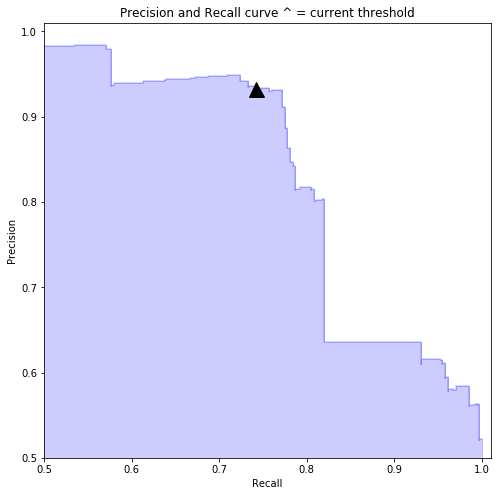

In [39]:
precision_recall_threshold(p, r, thresholds, 0.10)

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

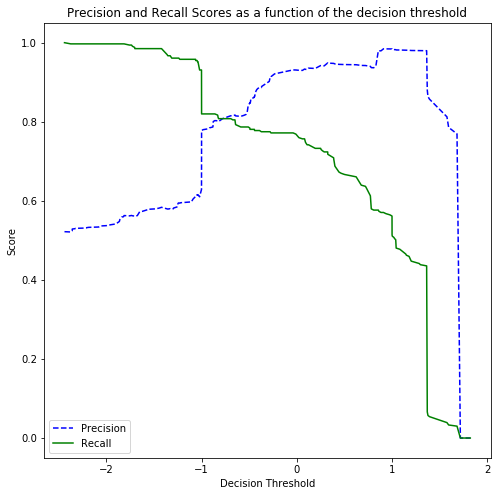

In [30]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [31]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')


0.8801875269765178


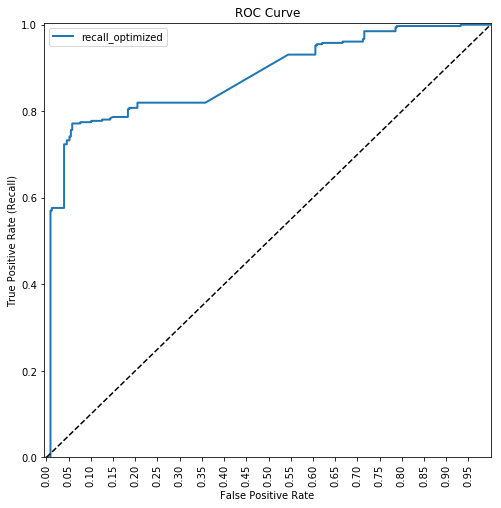

In [32]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')